# 필요 패키지 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rc('axes', unicode_minus=False)
mpl.rcParams['font.family'] = 'batang'

sns.set_style('dark') # 노트
sns.set(color_codes=True)
sns.set(font_scale=2)
plt.rc('figure', figsize=(10,8))
# sns.set(font='batang', rc={'axes.unicode_minus':False}, style='darkgrid')
warnings.filterwarnings('ignore')

# 데이터 로딩

In [3]:
data = pd.read_excel('C:/k_digital/Sourcce/data/Online_Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 데이터 사본 만들기
#df = pd.read_excel('C:/k_digital/Sourcce/data/Online_Retail.xlsx')
# 데이터 클렌징
#df = df[df.CustomerID.notnull()]
#df = df[df.Quantity>0]
#df = df[df.UnitPrice>0]

## 데이터 기초 정보 확인
- **InvoiceNo(주문번호)**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode(상품코드)**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description(상품명)**: Product (item) name. Nominal.
- **Quantity(수량)**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate(주문날짜)**: Invice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice(상품가격)**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID(고객번호)**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country(거주지)**: Country name. Nominal, the name of the country where each customer resides.

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


 - 내 생각
- 결측값이 제품명과 고객아이디에 존재.
- 고객아이디는 크게 영향을 끼치지 않기 때문에 -99로 대체
- 제품명은 먼저 제춤코드를 통해 존재하면 갔다 붙이고 없으면 고민,
 - 샘
-고객아이디가 살짝 걸림.(10만건의 결측치) 비회원 구매로 인한 누락으로 추정

In [6]:
# 기초통계량 확인
data.describe() # 판단할수 없는 이상치(min)값 확인.

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- 상품의 수량과 가격의 최소값의 음수를 이상치로 판단 → 이상치 제거

In [7]:
# 컬럼별 누락수
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

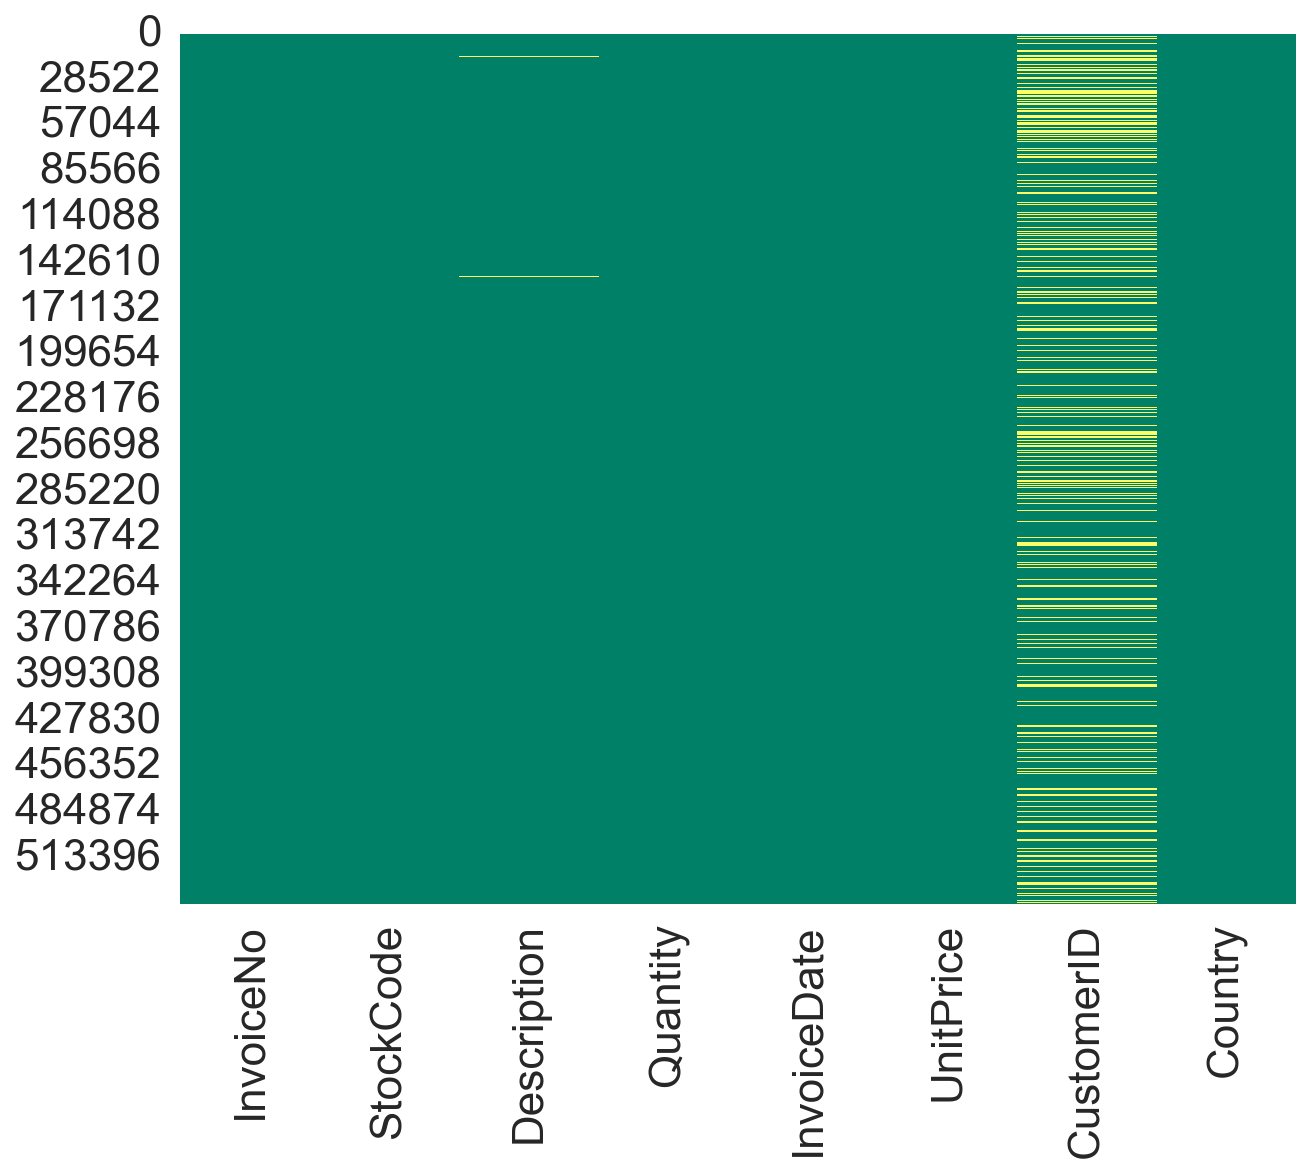

In [4]:
# 결측치 시각화(히트맵이용)
sns.heatmap(data.isnull(), cbar = False, cmap = 'summer')

In [20]:
# missingno 패키지를 인스톨하여서 이용하는 방법도 있음
!pip install missingno

<AxesSubplot:>

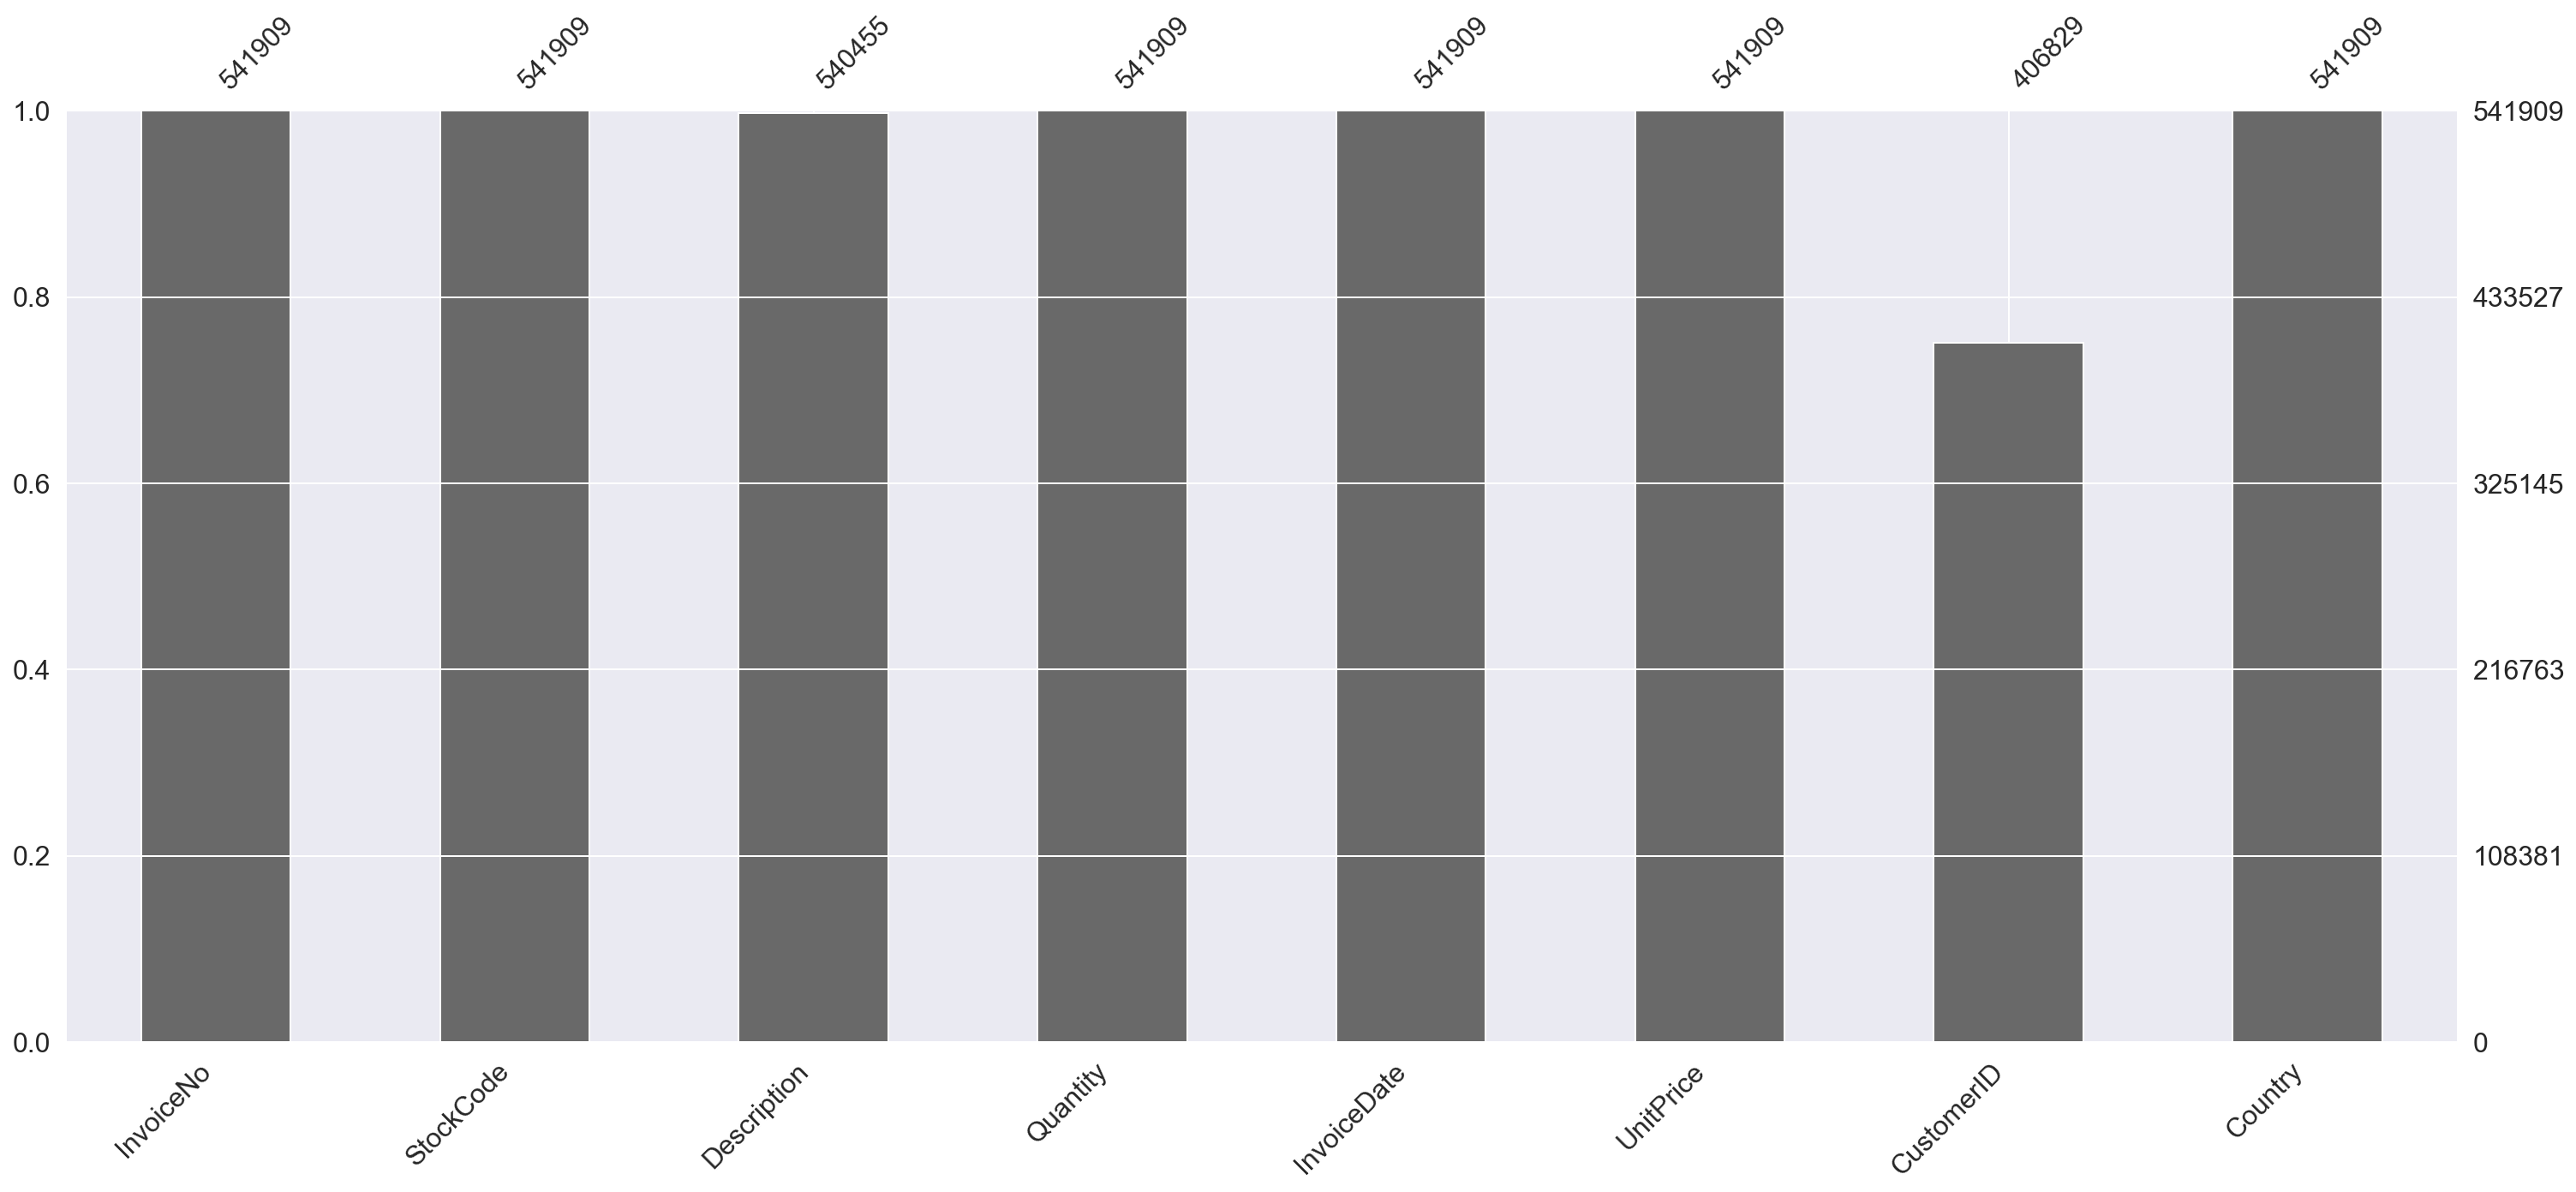

In [5]:
import missingno as msn
msn.bar(data) 
# msn.heatmap(data) 등의 방법도 있음

<AxesSubplot:>

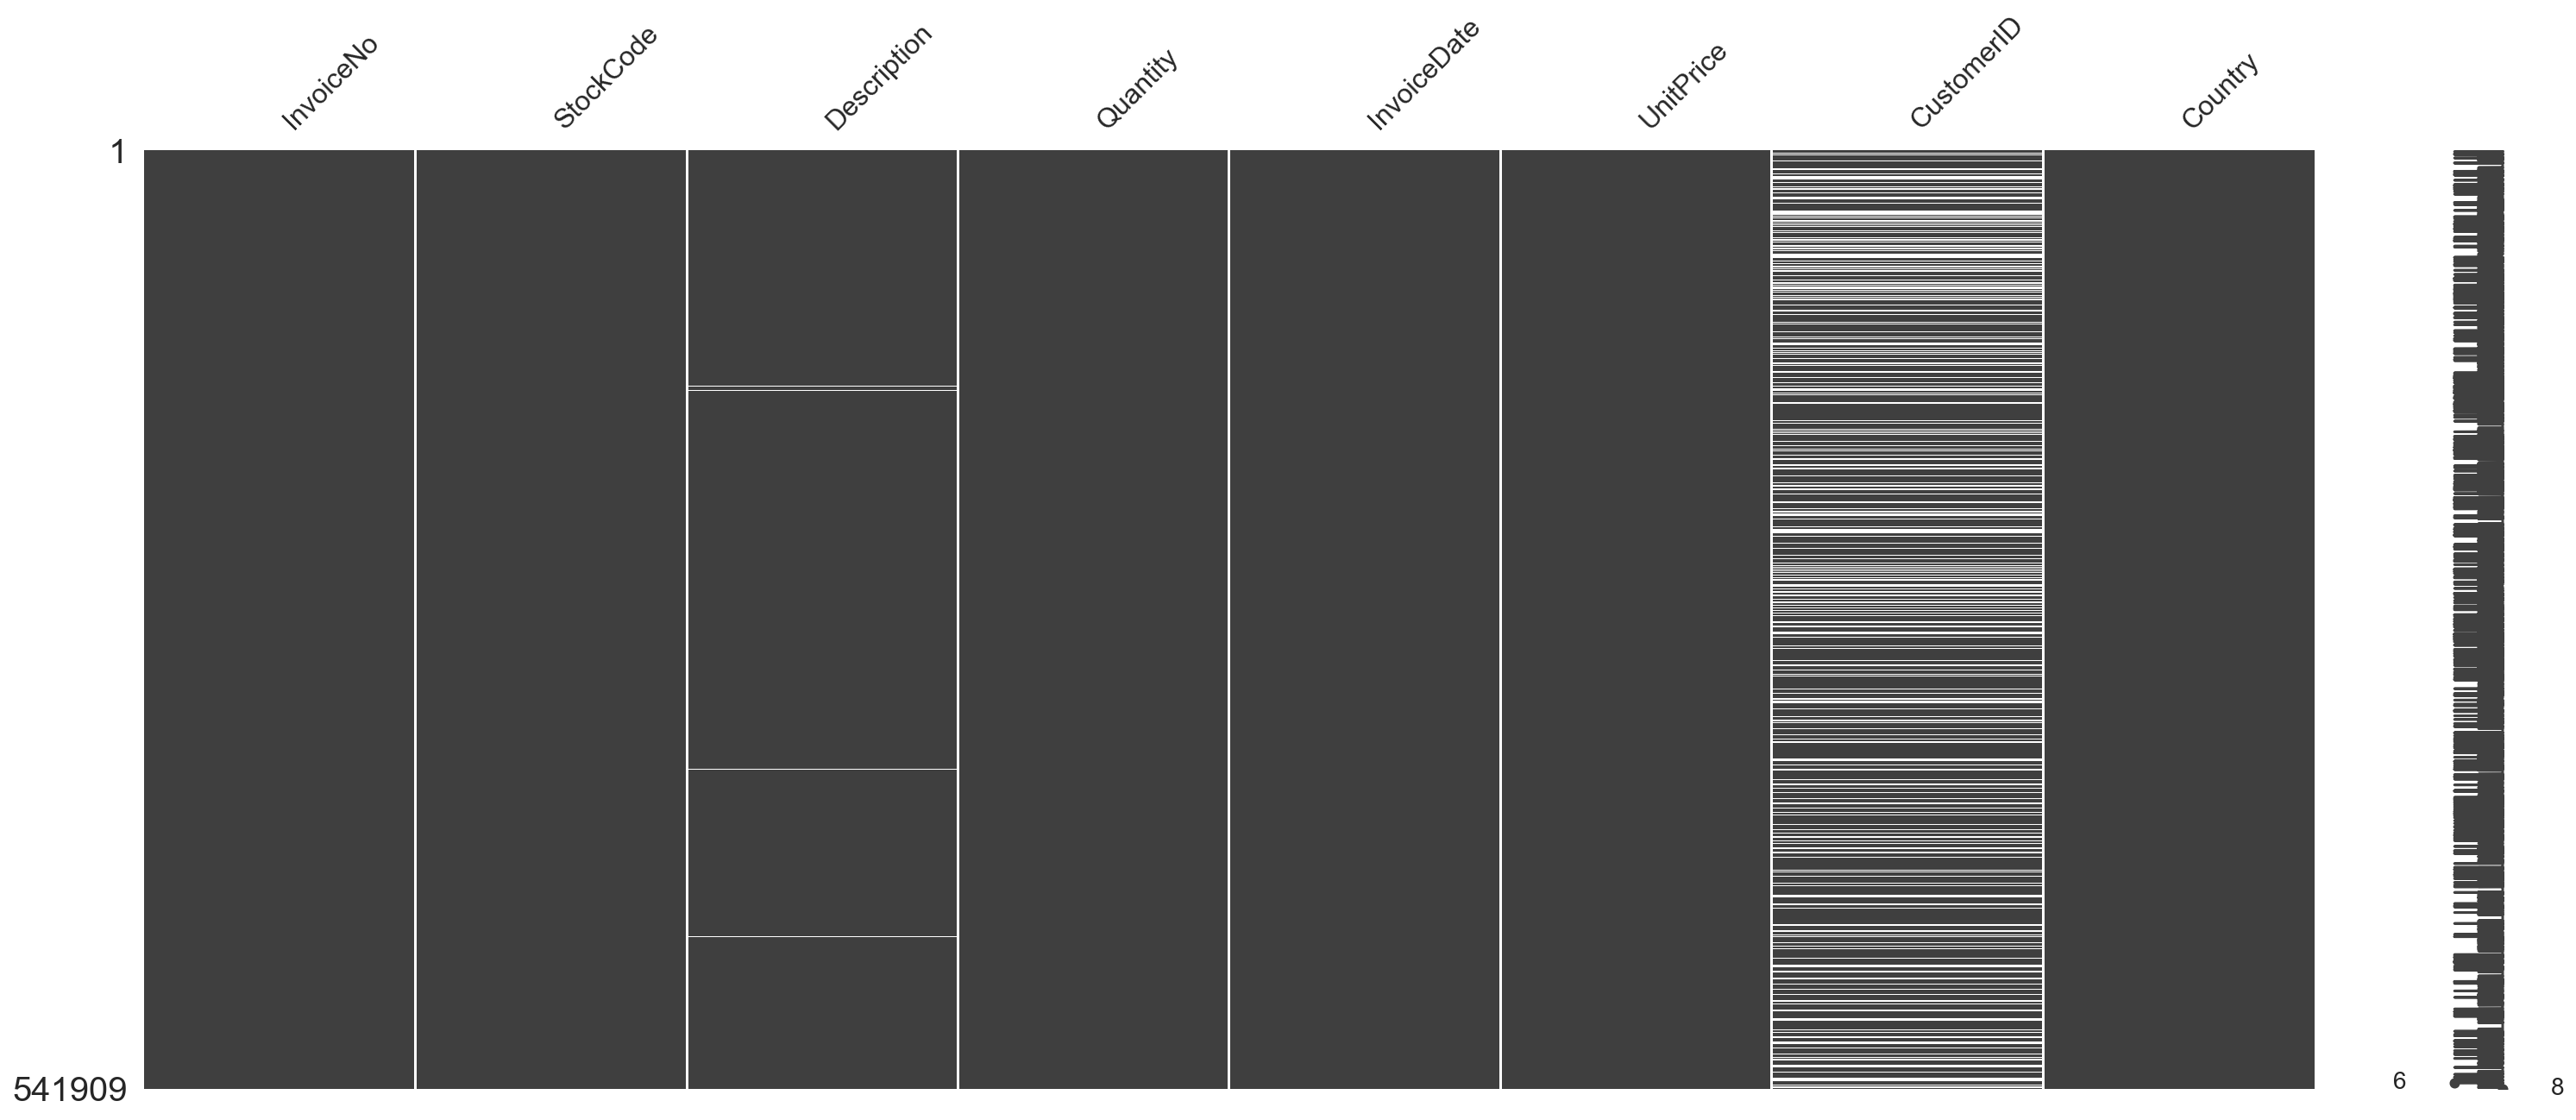

In [10]:
msn.matrix(data)

## Data Cleansing

In [12]:
# 누락되 고객 id컬럼에 누락행을 제거
data = data[data.CustomerID.notnull()]
len(data) # 결측치 제거 된것을 확인

406829

In [13]:
# Quantity & UnitPrice : 이상치(음수값) 제거
data = data[data.Quantity>0]
data = data[data.UnitPrice>0]
len(data) # 제거된 것 확인

397884

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [13]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
data.CustomerID = data.CustomerID.astype(np.int32)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [15]:
data.CustomerID = data.CustomerID.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.2+ MB


In [16]:
# 다른 방식: 다운 캐스팅, 메모리를 조금 더 효율적으로 써야할 필요가 있기 떄문에
# data.CustomerID = pd.to_numeric(data.CustomerID, downcast='integer')

In [16]:
# 금액 변수 만들기
data['Price'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [18]:
# 정제 완료 데이터 저장
data.to_csv('online_retail.csv', index=False) # index추가시 다시 불러올떄 인덱스가 두개

## 전체 매출과 국가별 매출 분석

In [25]:
# 전체 매출
data['Price'].sum()

8911407.904

In [58]:
# 국가별 매출
a = data.groupby('Country')['Price'].sum().sort_values()

In [48]:
cols = data.Country.unique()
cols

In [45]:
a

Country
Australia                138521.310
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20450.440
Cyprus                    13590.380
Czech Republic              826.740
Denmark                   18955.340
EIRE                     265545.900
European Community         1300.250
Finland                   22546.080
France                   209024.050
Germany                  228867.140
Greece                     4760.520
Iceland                    4310.000
Israel                     7221.690
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal                  33439.890
RSA                 

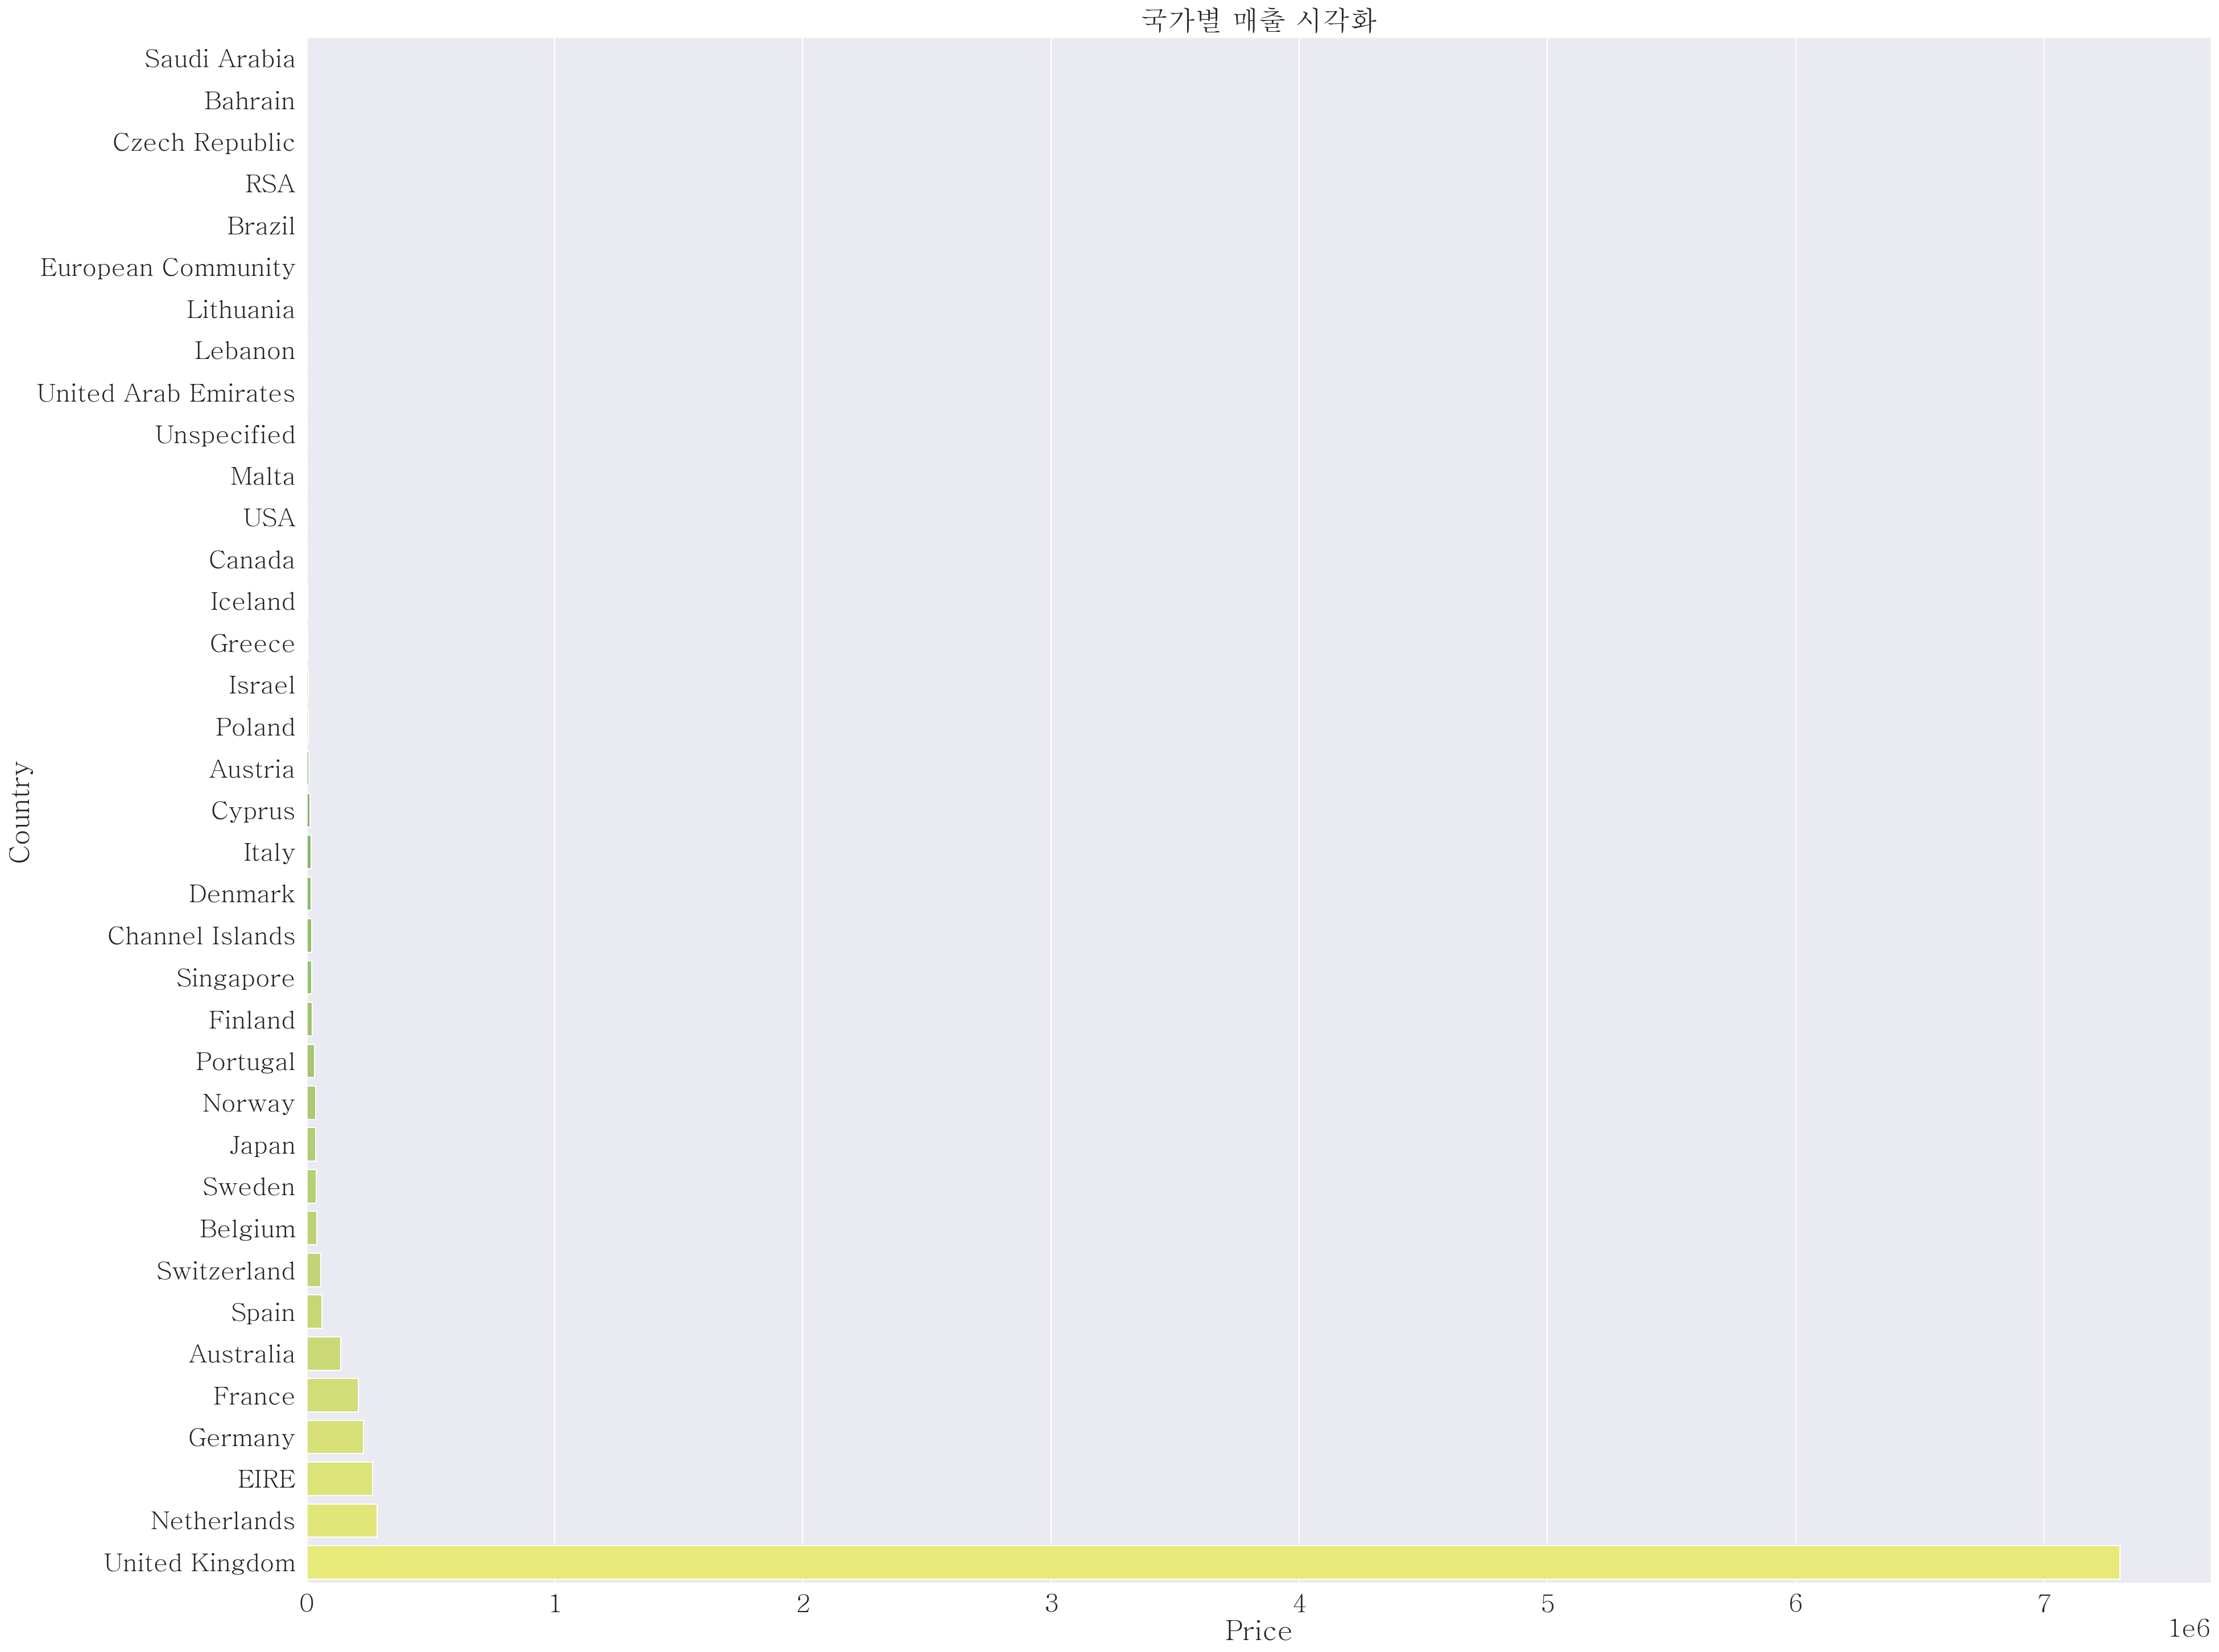

In [59]:
# 국가별 매출 시각화
## a = 국가별 매출
mpl.rcParams['font.family'] = 'batang'
sns.barplot(a, a.index, palette='summer')
sns.set(font_scale=2)
plt.title('국가별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()

# 인덱스를 가져오니깐 맞넹 ㅎㅎ

In [50]:
# 국가별 매출 시각화
rev_by_countries = data.groupby('Country')['Price'].sum().sort_values()

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

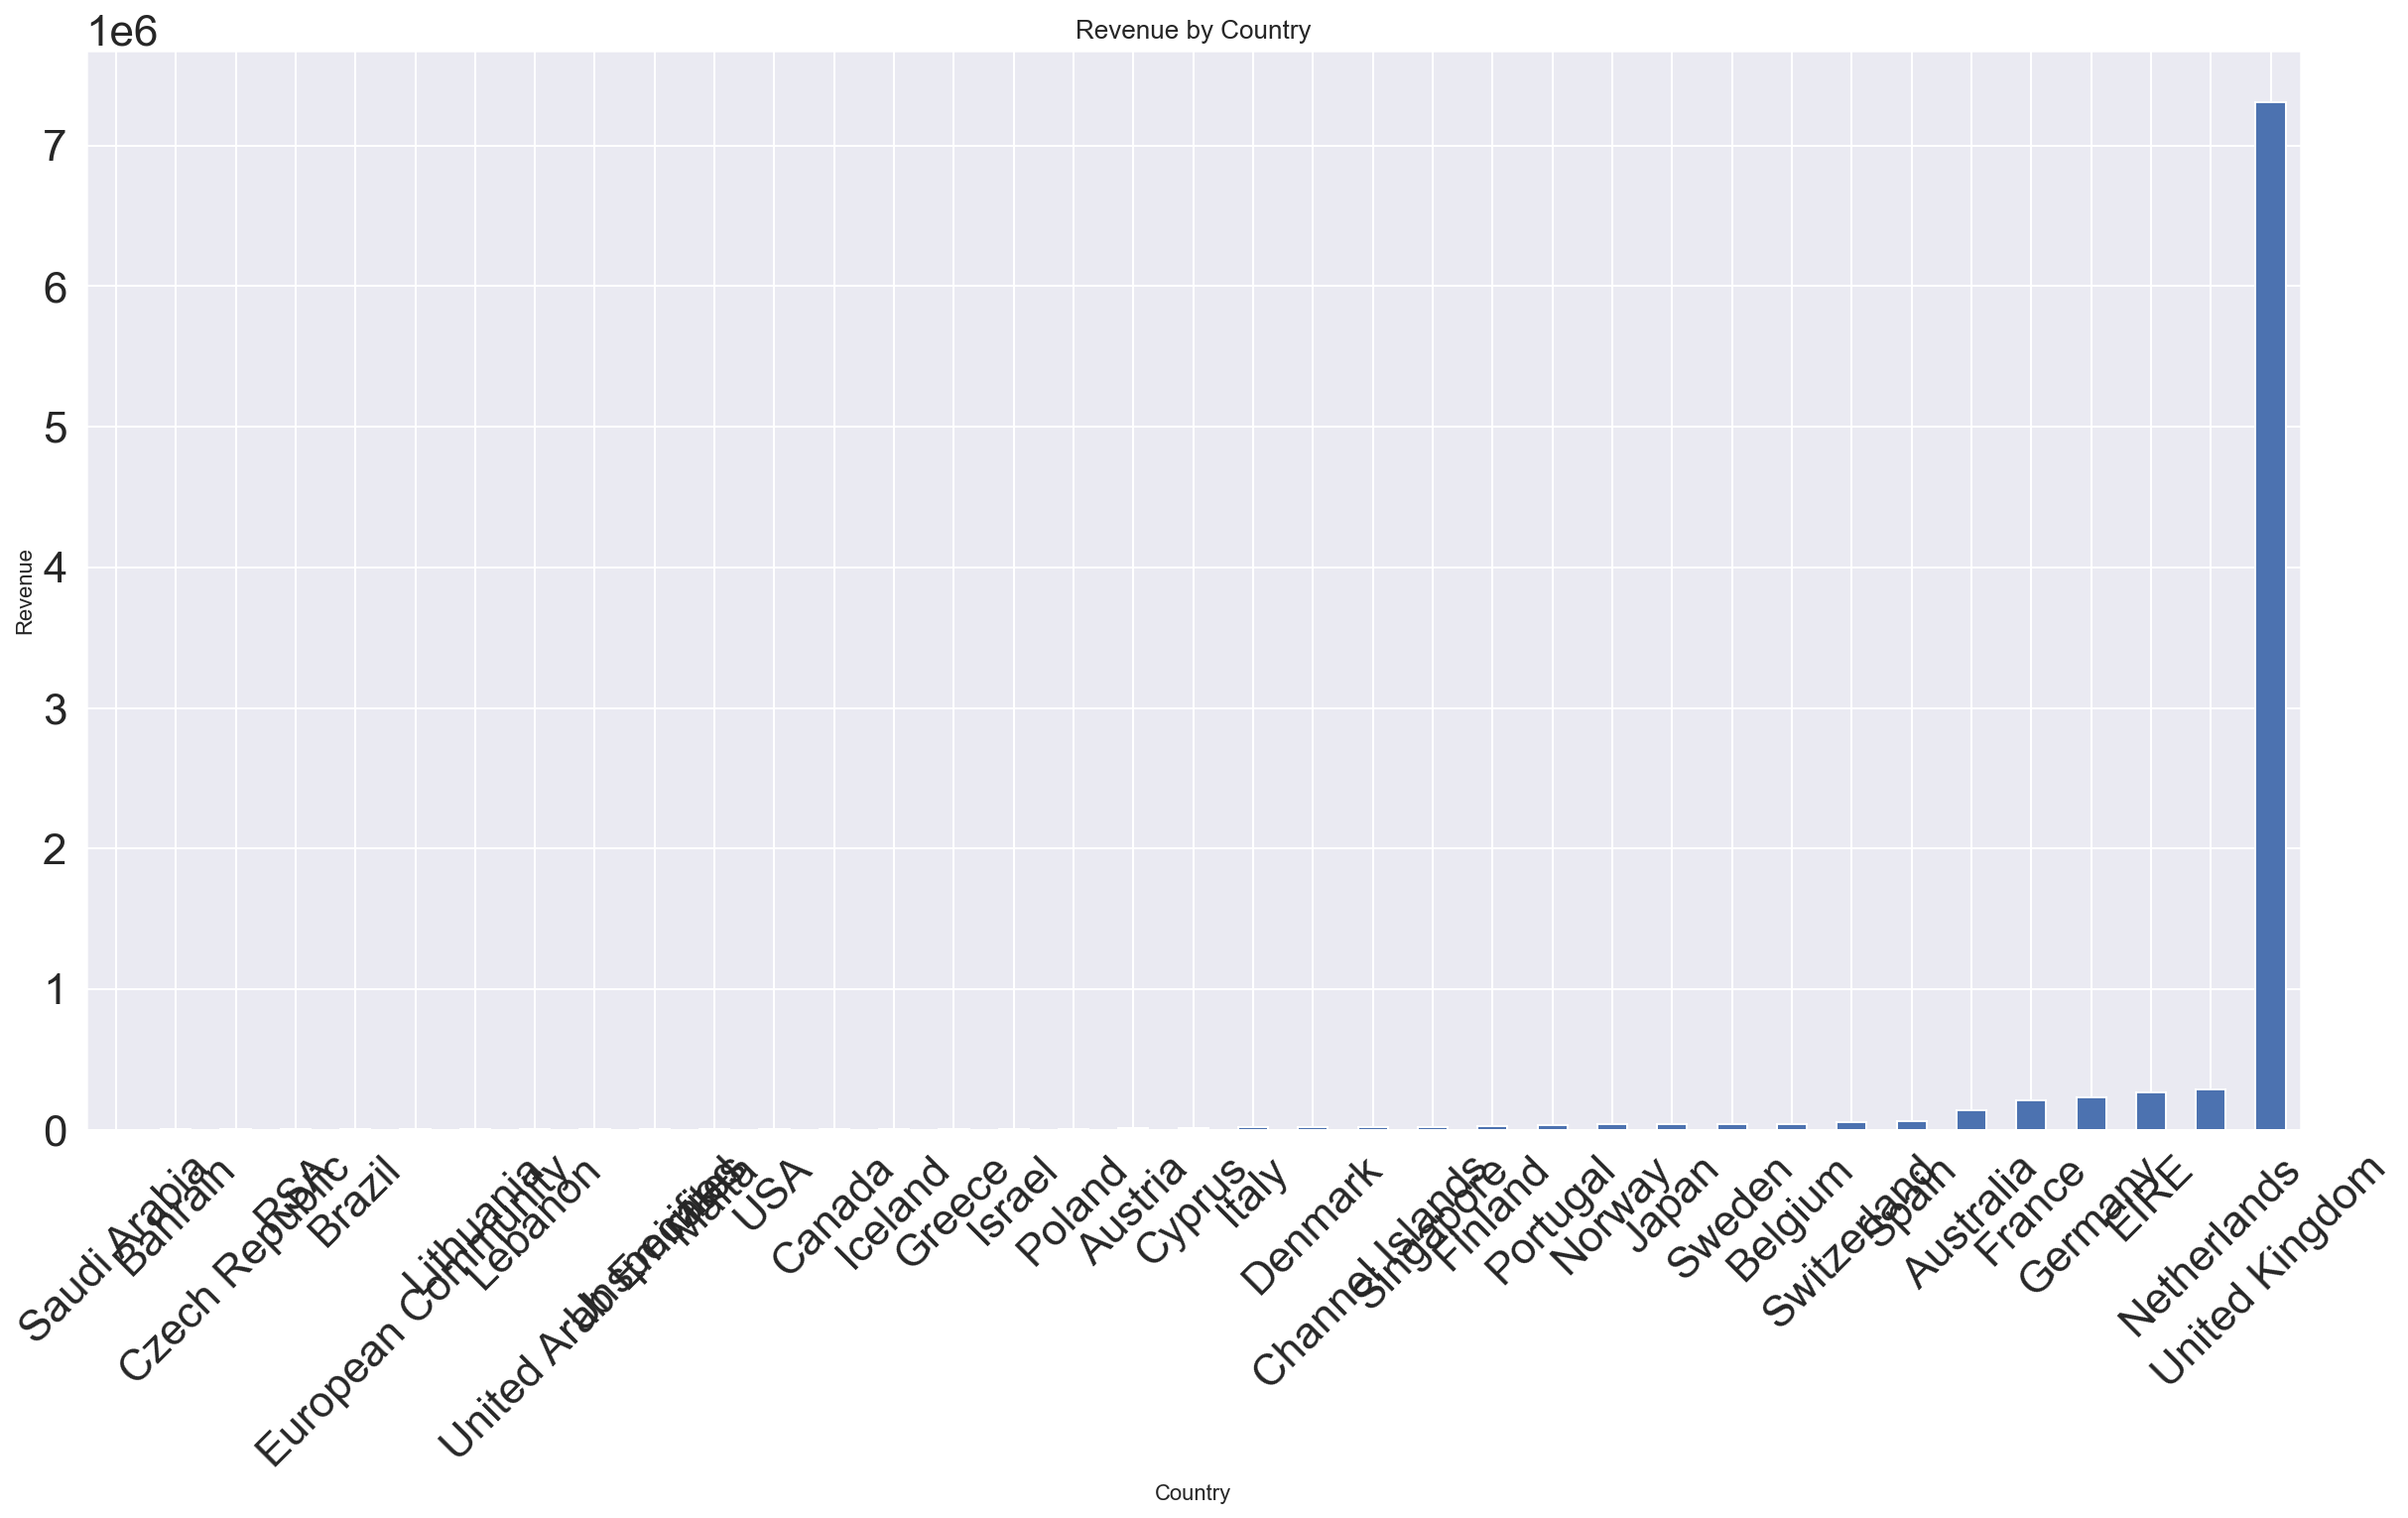

In [60]:
plot=a.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('Country',fontsize=11)
plot.set_ylabel('Revenue',fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=a.index, rotation=45)

In [ ]:
plot=(rev_by_countries/total_revenue).plot(kind='pie',figsize=(20,10))

## 연월별 매출, 요일별 매출

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
 8   Price        397884 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


In [56]:
data.iloc[0,4]# 날짜 정보

Timestamp('2010-12-01 08:26:00')

In [57]:
data.iloc[0,4].year # 년도만, 월은 month ...

2010

### 연월별 매출

In [67]:
data = data.set_index('InvoiceDate') 
# 날짜정보 컬럼을 인덱스로
import datetime

In [108]:
a = data.groupby(data.index.year)

In [116]:
x = data.groupby(data.index.strftime('%Y/%m'))['Price'].sum()
x

InvoiceDate
2010/12     572713.890
2011/01     569445.040
2011/02     447137.350
2011/03     595500.760
2011/04     469200.361
2011/05     678594.560
2011/06     661213.690
2011/07     600091.011
2011/08     645343.900
2011/09     952838.382
2011/10    1039318.790
2011/11    1161817.380
2011/12     518192.790
Name: Price, dtype: float64

In [85]:
y_price = data.groupby(data.index.year)['Price'].sum()
y_price

InvoiceDate
2010     572713.890
2011    8338694.014
Name: Price, dtype: float64

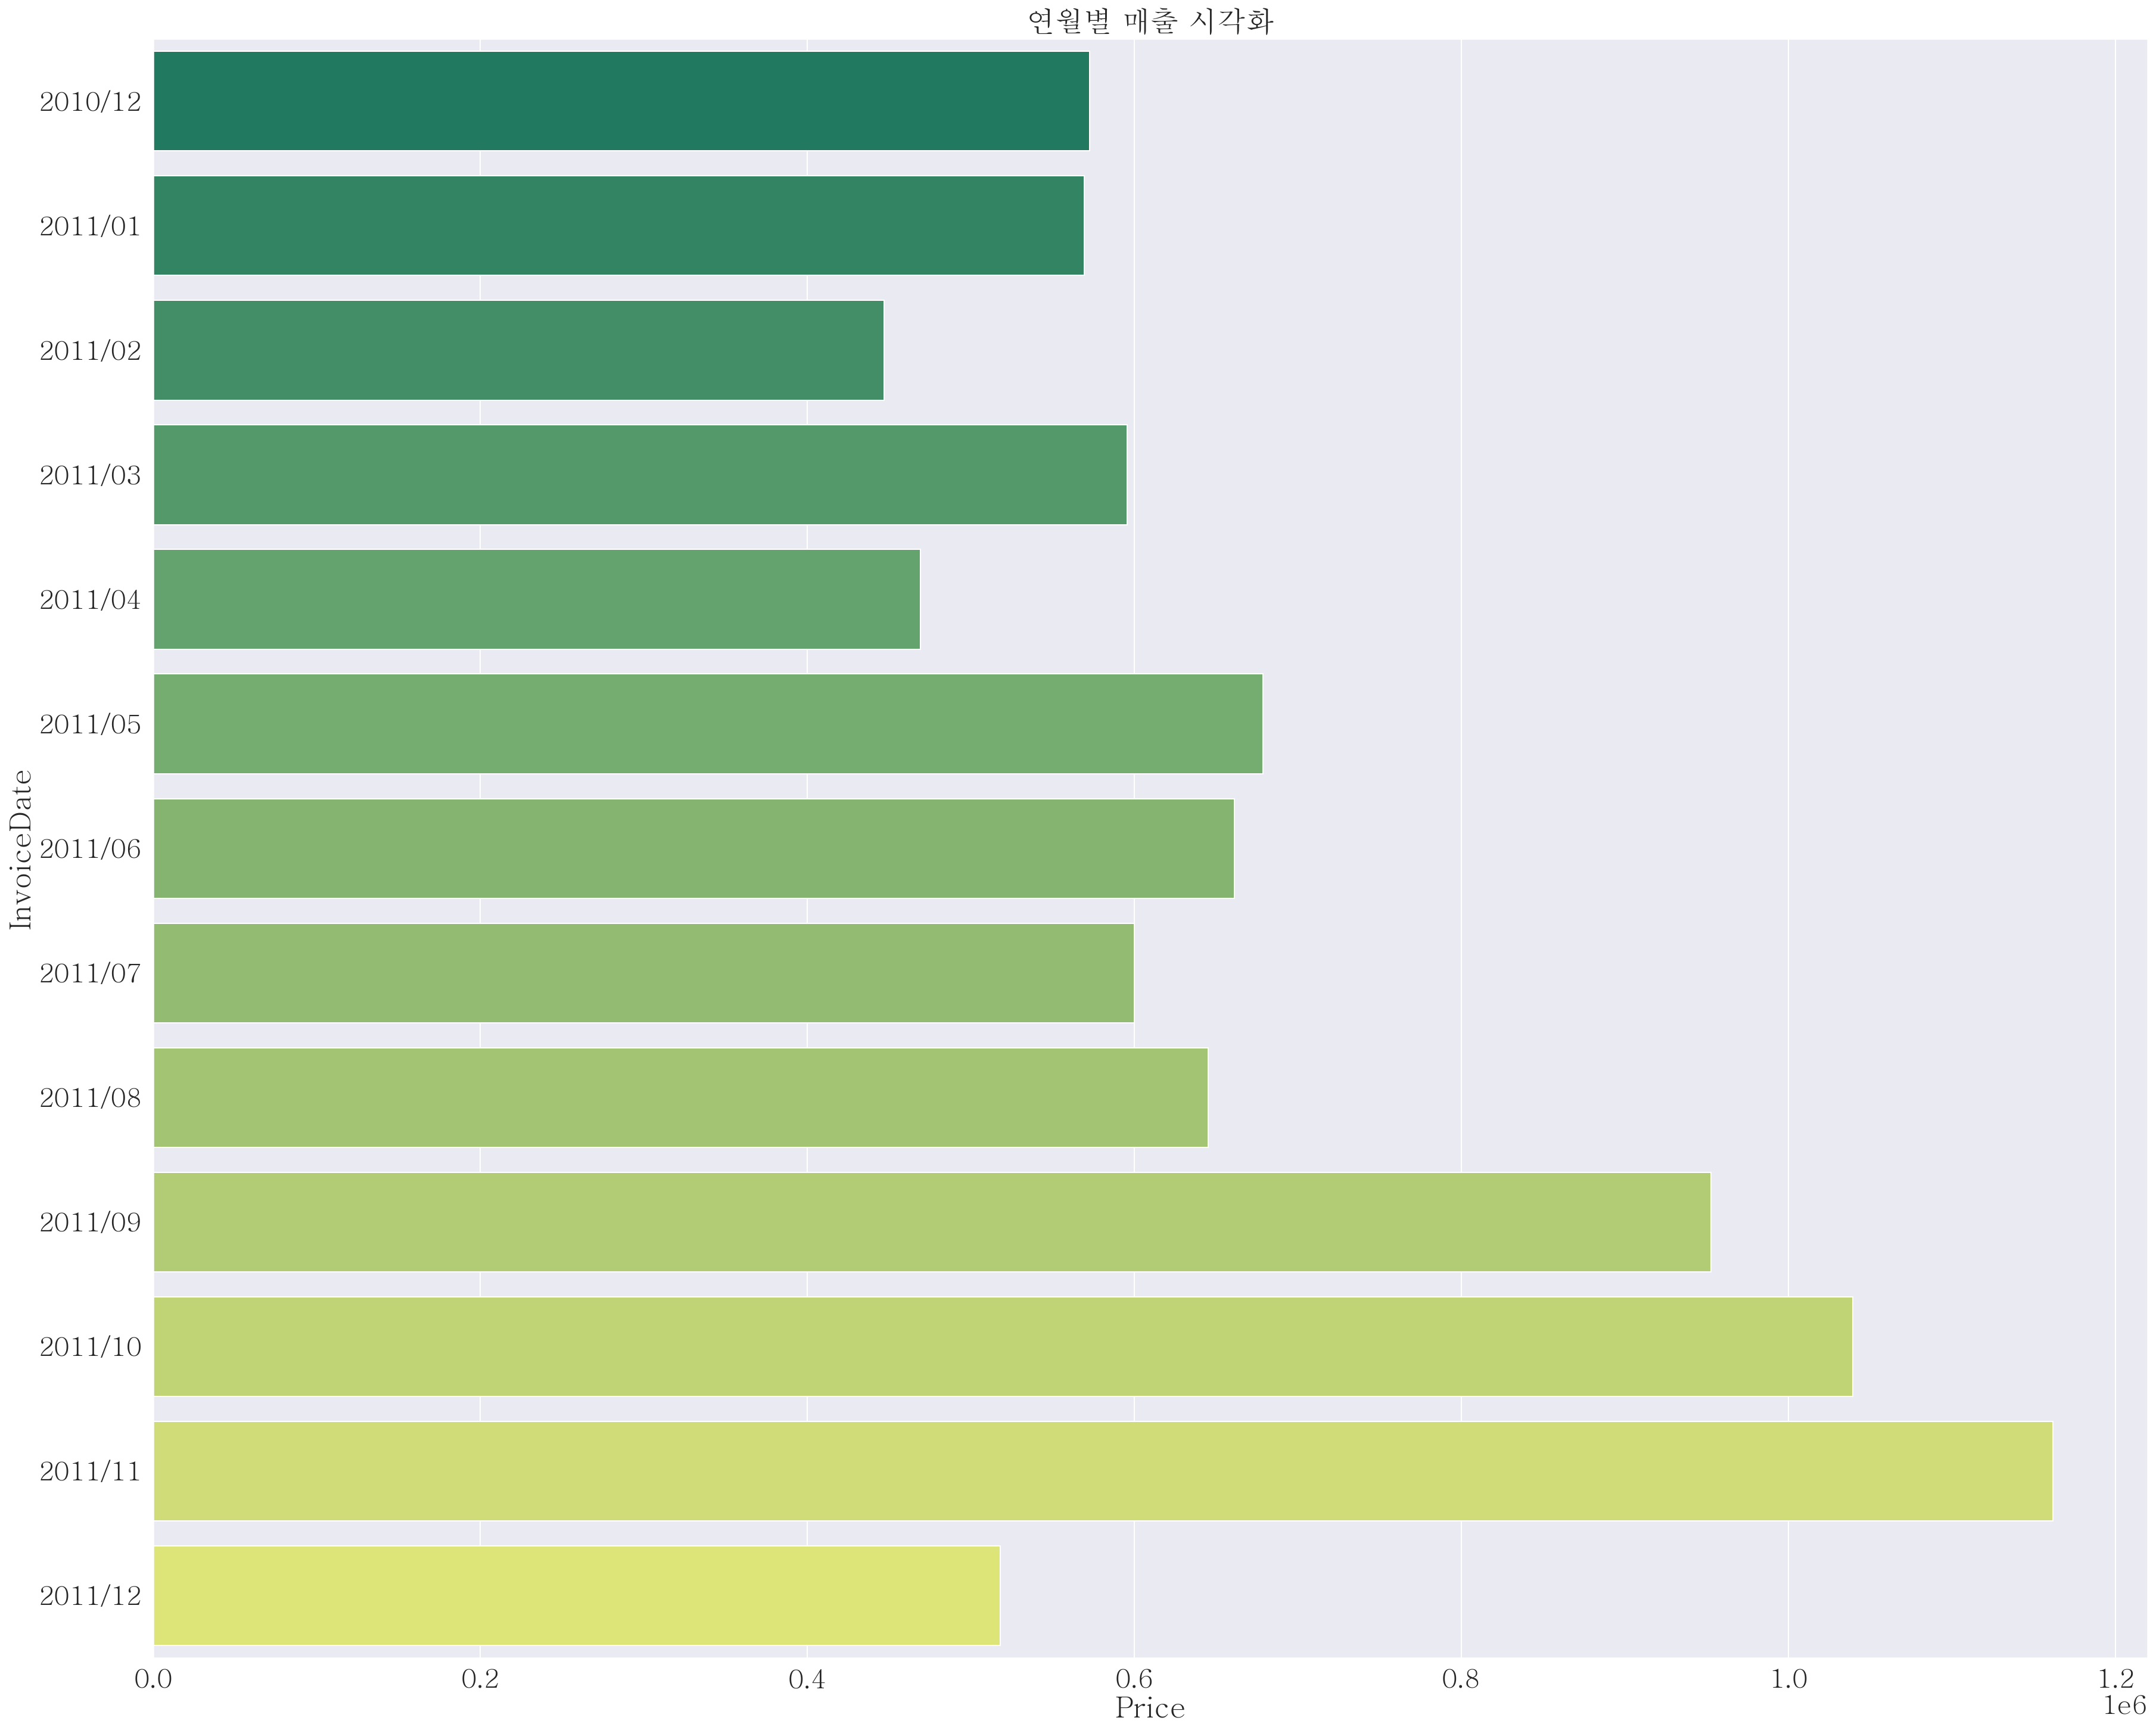

In [117]:
mpl.rcParams['font.family'] = 'batang'
sns.barplot(x, x.index, palette='summer')
sns.set(font_scale=2)
plt.title('연월별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()

In [118]:
m_rate = x/x.sum() *100

In [84]:
m_price =data.groupby(data.index.month)['Price'].sum()
m_price

InvoiceDate
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: Price, dtype: float64

In [90]:
m_rate = m_price/m_price.sum() *100

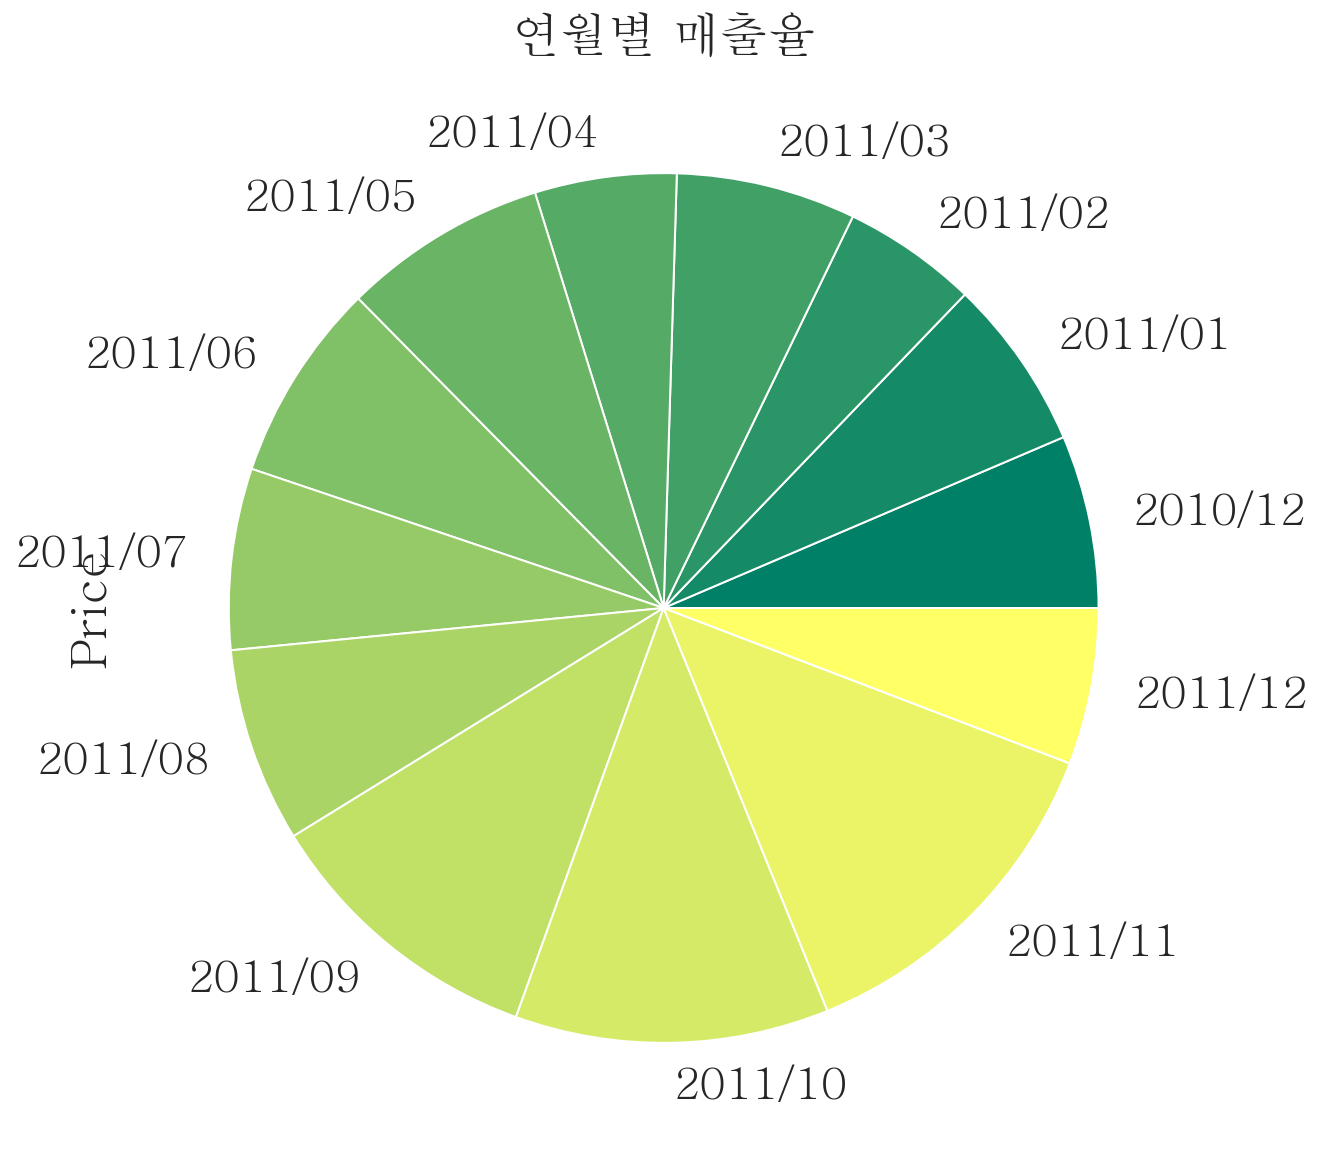

In [119]:
mpl.rcParams['font.family'] = 'batang'
plt.title('연월별 매출율')
plot=m_rate.plot(kind='pie',figsize=(20,10), cmap='summer')

### 요일별 매출 시각화

In [98]:
d_price =data.groupby(data.index.day_name())['Price'].sum().sort_values()

In [99]:
d_price

InvoiceDate
Sunday        792514.221
Monday       1367146.411
Friday       1485917.401
Wednesday    1588336.170
Tuesday      1700634.631
Thursday     1976859.070
Name: Price, dtype: float64

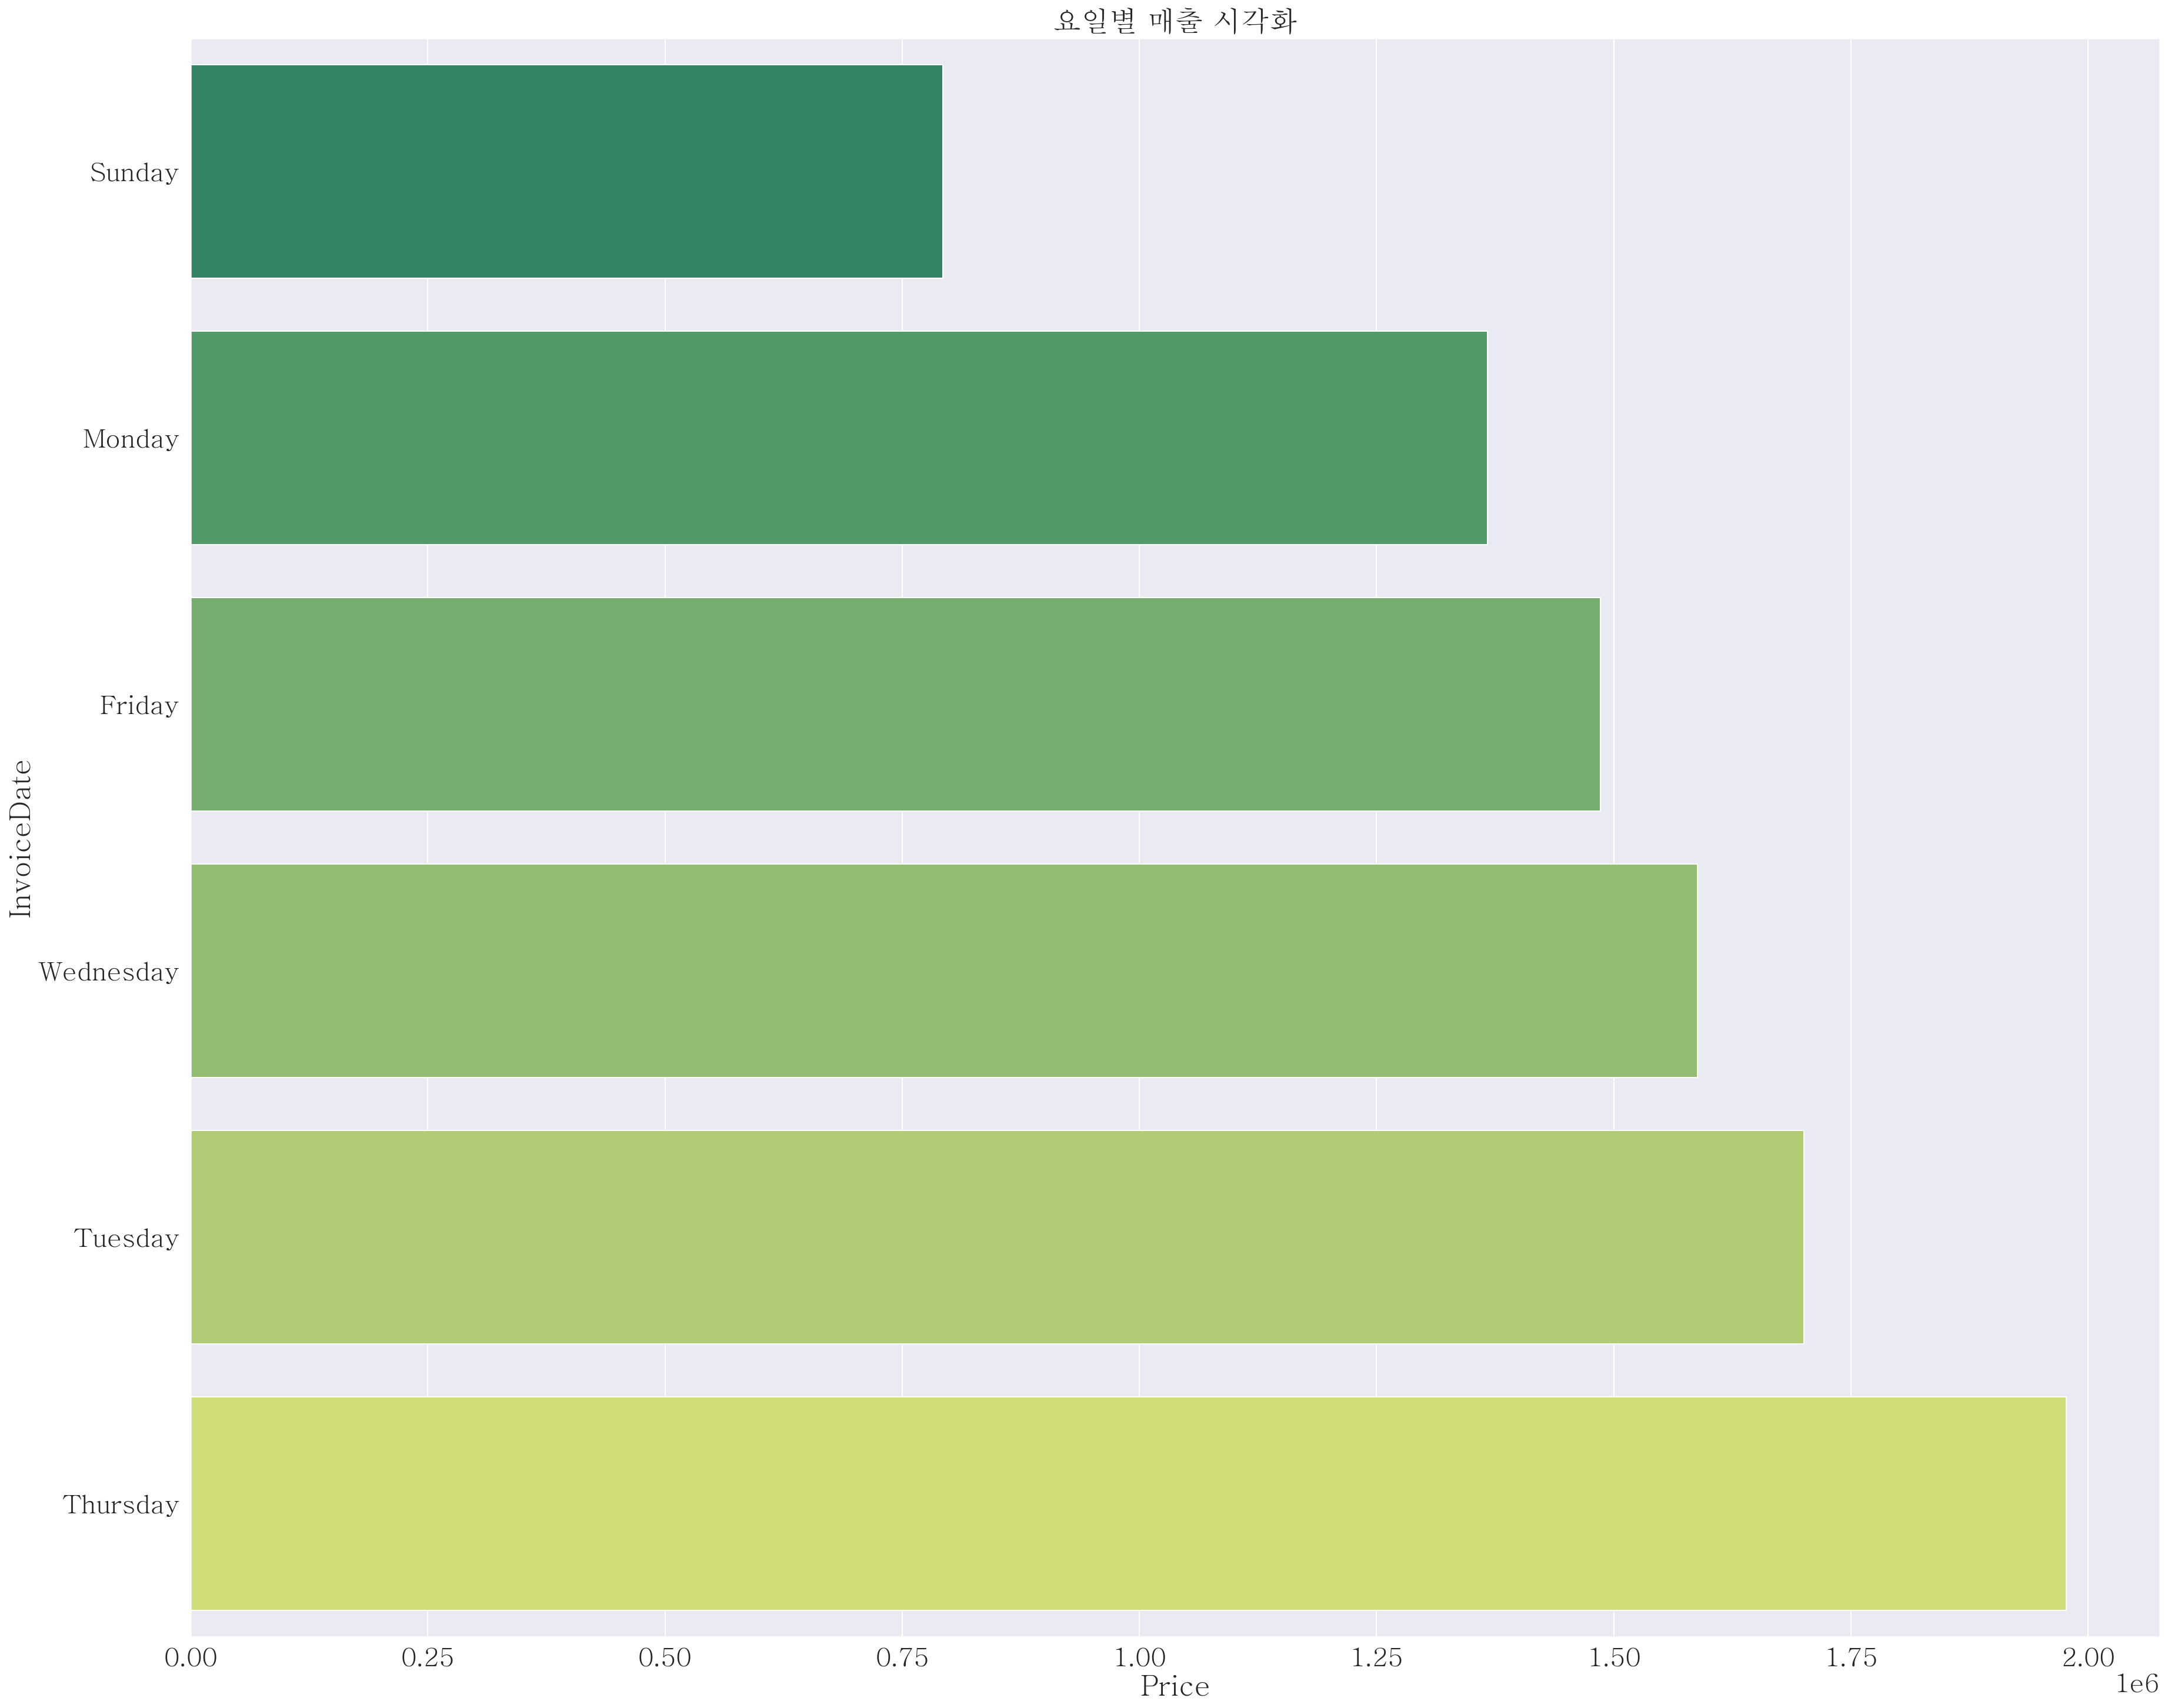

In [100]:
mpl.rcParams['font.family'] = 'batang'
sns.barplot(d_price,d_price.index, palette='summer')
plt.title('요일별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()

## 시간대별 매출, 상위 매출 제품의 월별 판매량 추이
### 시간대별 매출

In [120]:
t_price =data.groupby(data.index.time)['Price'].sum().sort_values()

In [124]:
# 시간대를 먼저 나눠야 할 듯 3시간 단위로 끊을까>?
##00:00:00 ~03:00, 03~06, 06~09, 09~12, 12~15, 15~18, 18~21, 21~24
# 시간대를 그냥 시간만 챙기고 분은 버려서 하자
time_p = data.groupby(data.index.strftime('%H'))['Price'].sum().sort_values()

In [126]:
time_p

InvoiceDate
06          4.250
20      18932.760
07      31059.210
19      49028.460
18     104954.430
17     234413.521
08     282115.630
16     468885.800
09     842605.171
15     966191.750
14     995629.371
11    1104558.750
13    1173264.750
10    1261192.571
12    1378571.480
Name: Price, dtype: float64

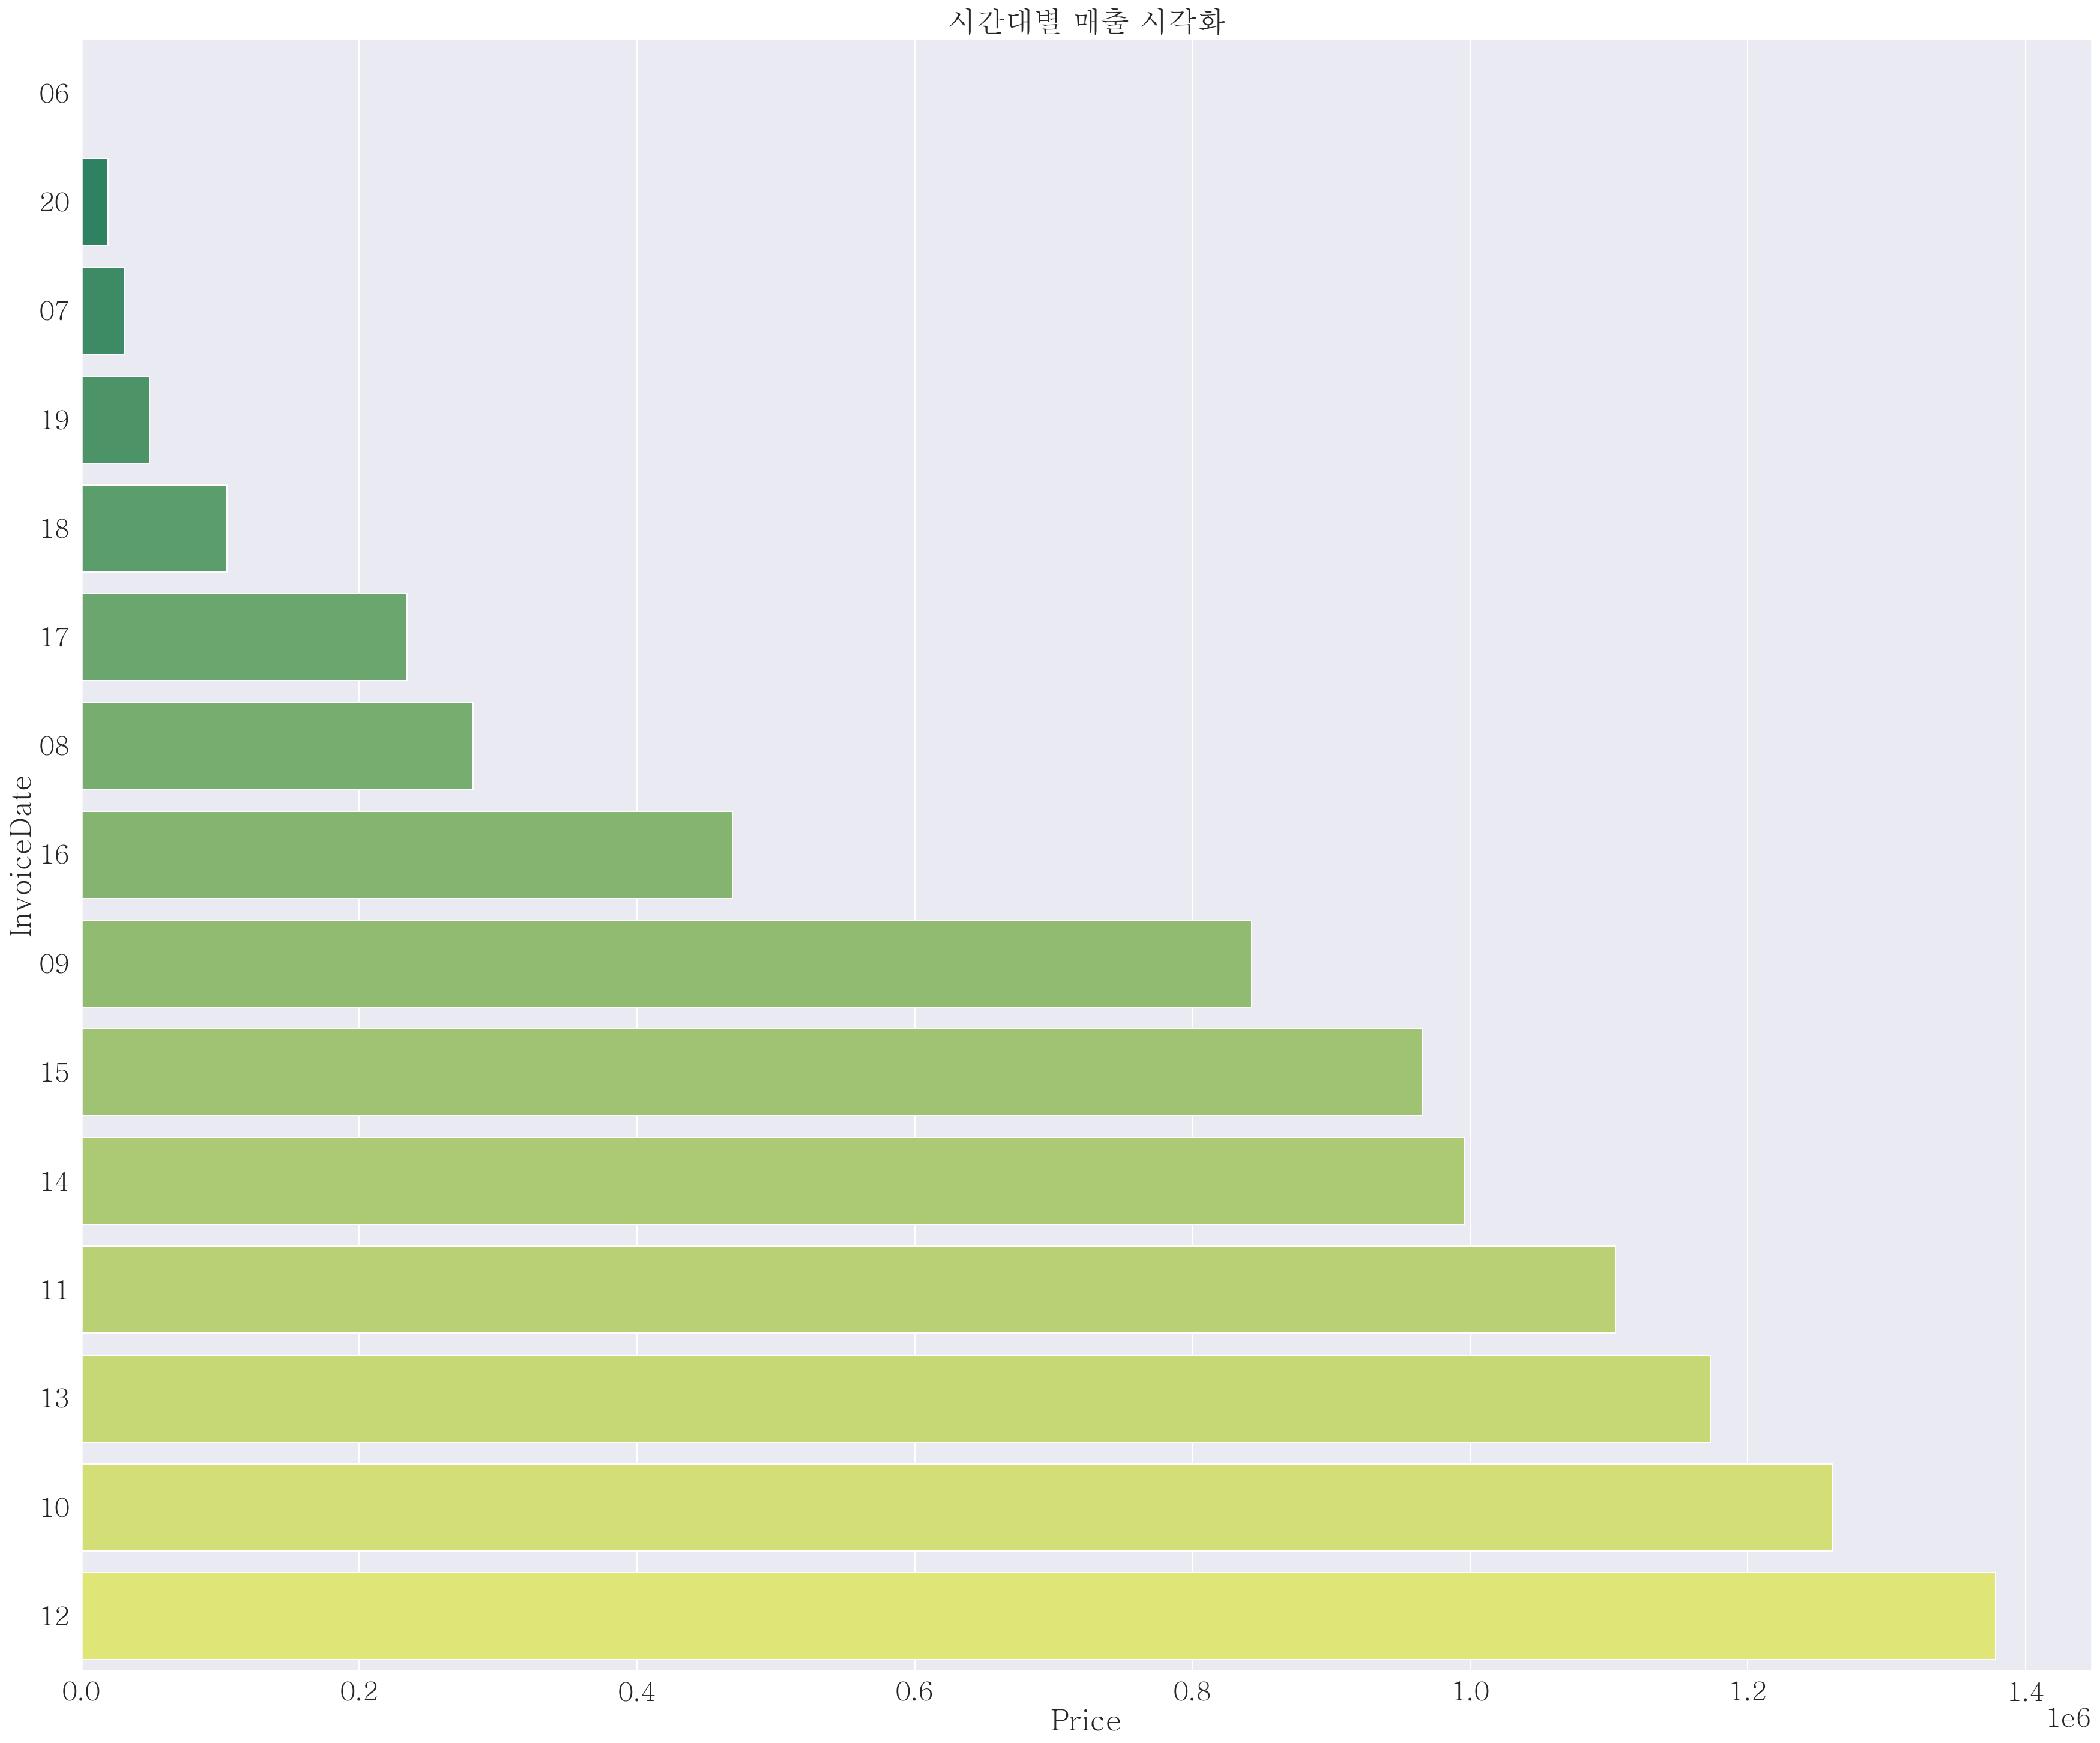

In [127]:
# 시간대별 매출 시각화 
mpl.rcParams['font.family'] = 'batang'
sns.barplot(time_p, time_p.index, palette='summer')
plt.title('시간대별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()


### 상위 매출 상품의 월별 만매량 추이

In [130]:
# 상품코드로 그룹화 하여 price랑 수량 각각으로 sum 하여서 솔트
sc_p = data.groupby('StockCode')['Price'].sum().sort_values(ascending=False)[:10]
sc_q = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:10]

In [148]:
month = []
price = []
col = []
def month_sc(data, value):
    if data['StockCode'] == value:
        month.append(data.index)
        price.append(data.Price)
        return col.append(value[i])

In [159]:
# 순위별 컬럼 값리스트
value= ['23843','22423','85123A', '85099B', '23166', 'POST',
       '47566', '84879','M', '23084']
month = []
price = []
col = []
for i, v in enumerate(value):
    if data[data['StockCode'] == i]:
        month.append(data.index)
        price.append(data.Price)
        col.append(1)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [185]:
# 순위별 컬럼 값리스트
value= ['23843','22423','85123A', '85099B', '23166', 'POST',
       '47566', '84879','M', '23084']
month = []
price = []
col = []


In [189]:
for i, v in enumerate(value):
    if data[data['StockCode'] == v].empty :
        month.append(data.index.strftime('%Y/%m'))
        price.append(data.Price)
        col.append(i)

In [192]:
col

[0, 1, 4, 6, 7, 9]

In [193]:
dt = {'Y_M': month, 'price': price, 'col':col }
pc = pd.DataFrame(dt)
pc.head()

,Y_M,price,col
0,"Index(['2010/12', '2010/12', '2010/12', '2010/...",InvoiceDate 2010-12-01 08:26:00 15.30 2010-...,0
1,"Index(['2010/12', '2010/12', '2010/12', '2010/...",InvoiceDate 2010-12-01 08:26:00 15.30 2010-...,1
2,"Index(['2010/12', '2010/12', '2010/12', '2010/...",InvoiceDate 2010-12-01 08:26:00 15.30 2010-...,4
3,"Index(['2010/12', '2010/12', '2010/12', '2010/...",InvoiceDate 2010-12-01 08:26:00 15.30 2010-...,6
4,"Index(['2010/12', '2010/12', '2010/12', '2010/...",InvoiceDate 2010-12-01 08:26:00 15.30 2010-...,7


In [180]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y_M     10 non-null     object
 1   price   10 non-null     object
 2   col     10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [162]:
data[data['StockCode'] == 23843]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Price
InvoiceDate,,,,,,,,
2011-12-09 09:15:00,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446,United Kingdom,168469.6


85123A    2035
22423     1723
85099B    1618
84879     1408
47566     1396
          ... 
90168        1
90169        1
90202A       1
90118        1
23843        1
Name: StockCode, Length: 3665, dtype: int64

In [147]:
sc_p
sc_p_m = data.groupby('StockCode')['Price']

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: Price, dtype: float64

[Text(0, 0, '23843'),
 Text(1, 0, '22423'),
 Text(2, 0, '85123A'),
 Text(3, 0, '85099B'),
 Text(4, 0, '23166'),
 Text(5, 0, 'POST'),
 Text(6, 0, '47566'),
 Text(7, 0, '84879'),
 Text(8, 0, 'M'),
 Text(9, 0, '23084')]

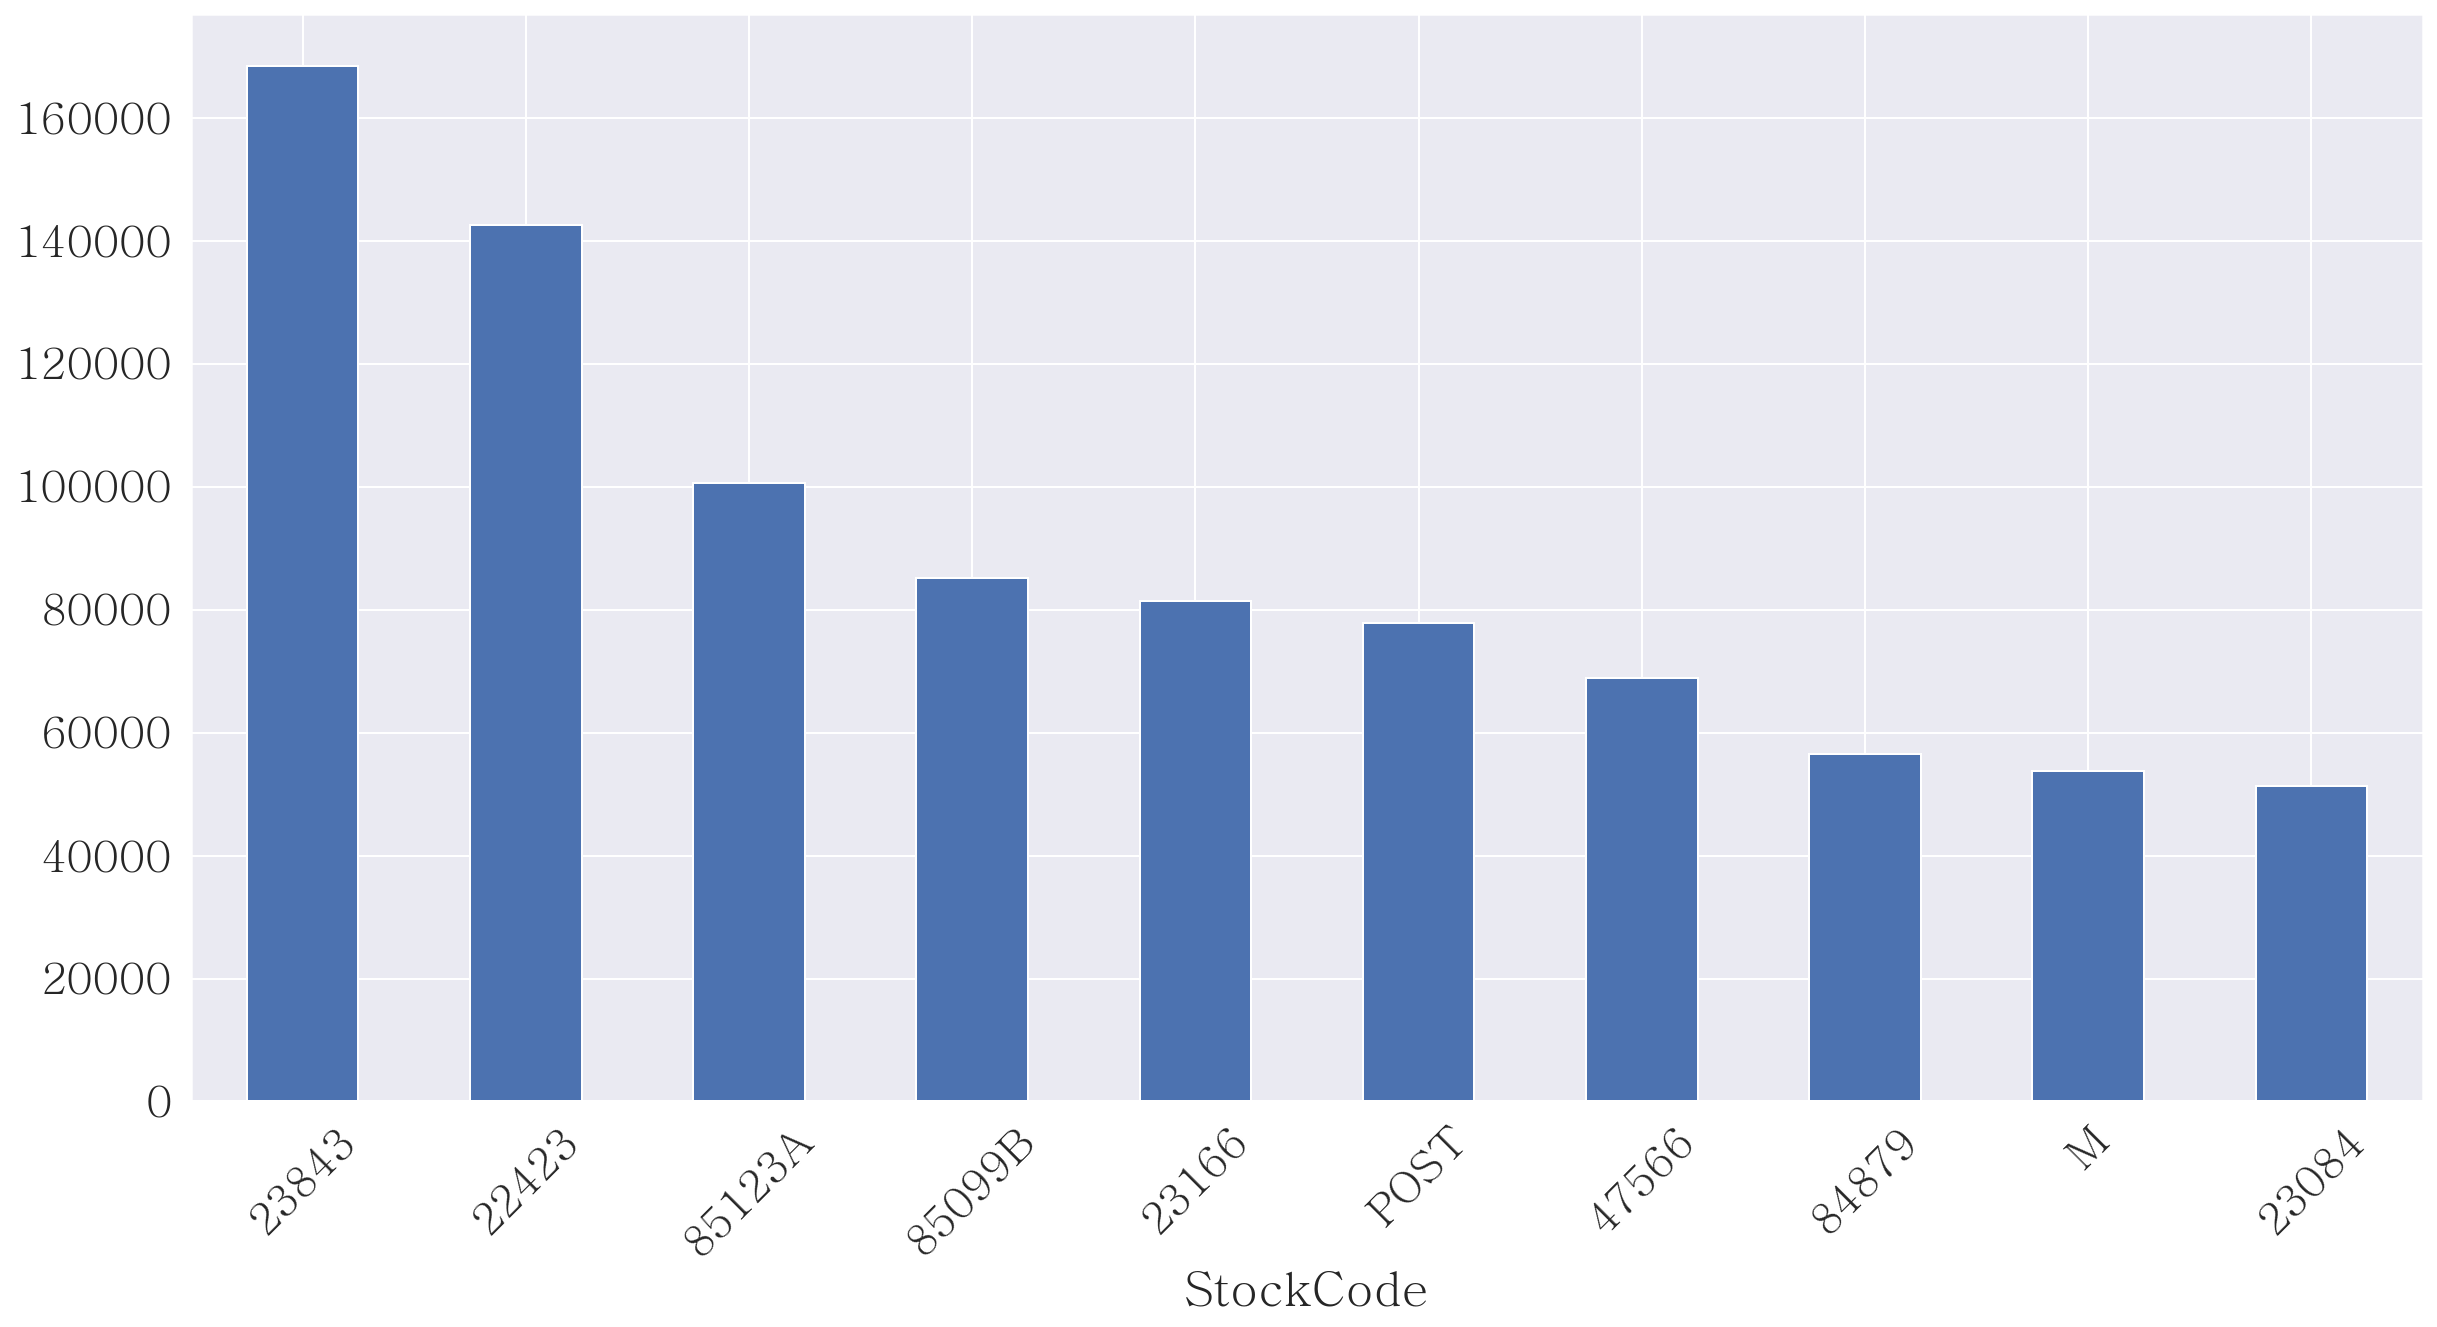

In [141]:
plot=sc_p.plot(kind='bar',figsize=(20,10))
plot.set_xticklabels(labels=sc_p.index, rotation=45)
plt.plot()
plt.title('top 10 매출의 월별 추이량')

TypeError: bar() missing 1 required positional argument: 'height'

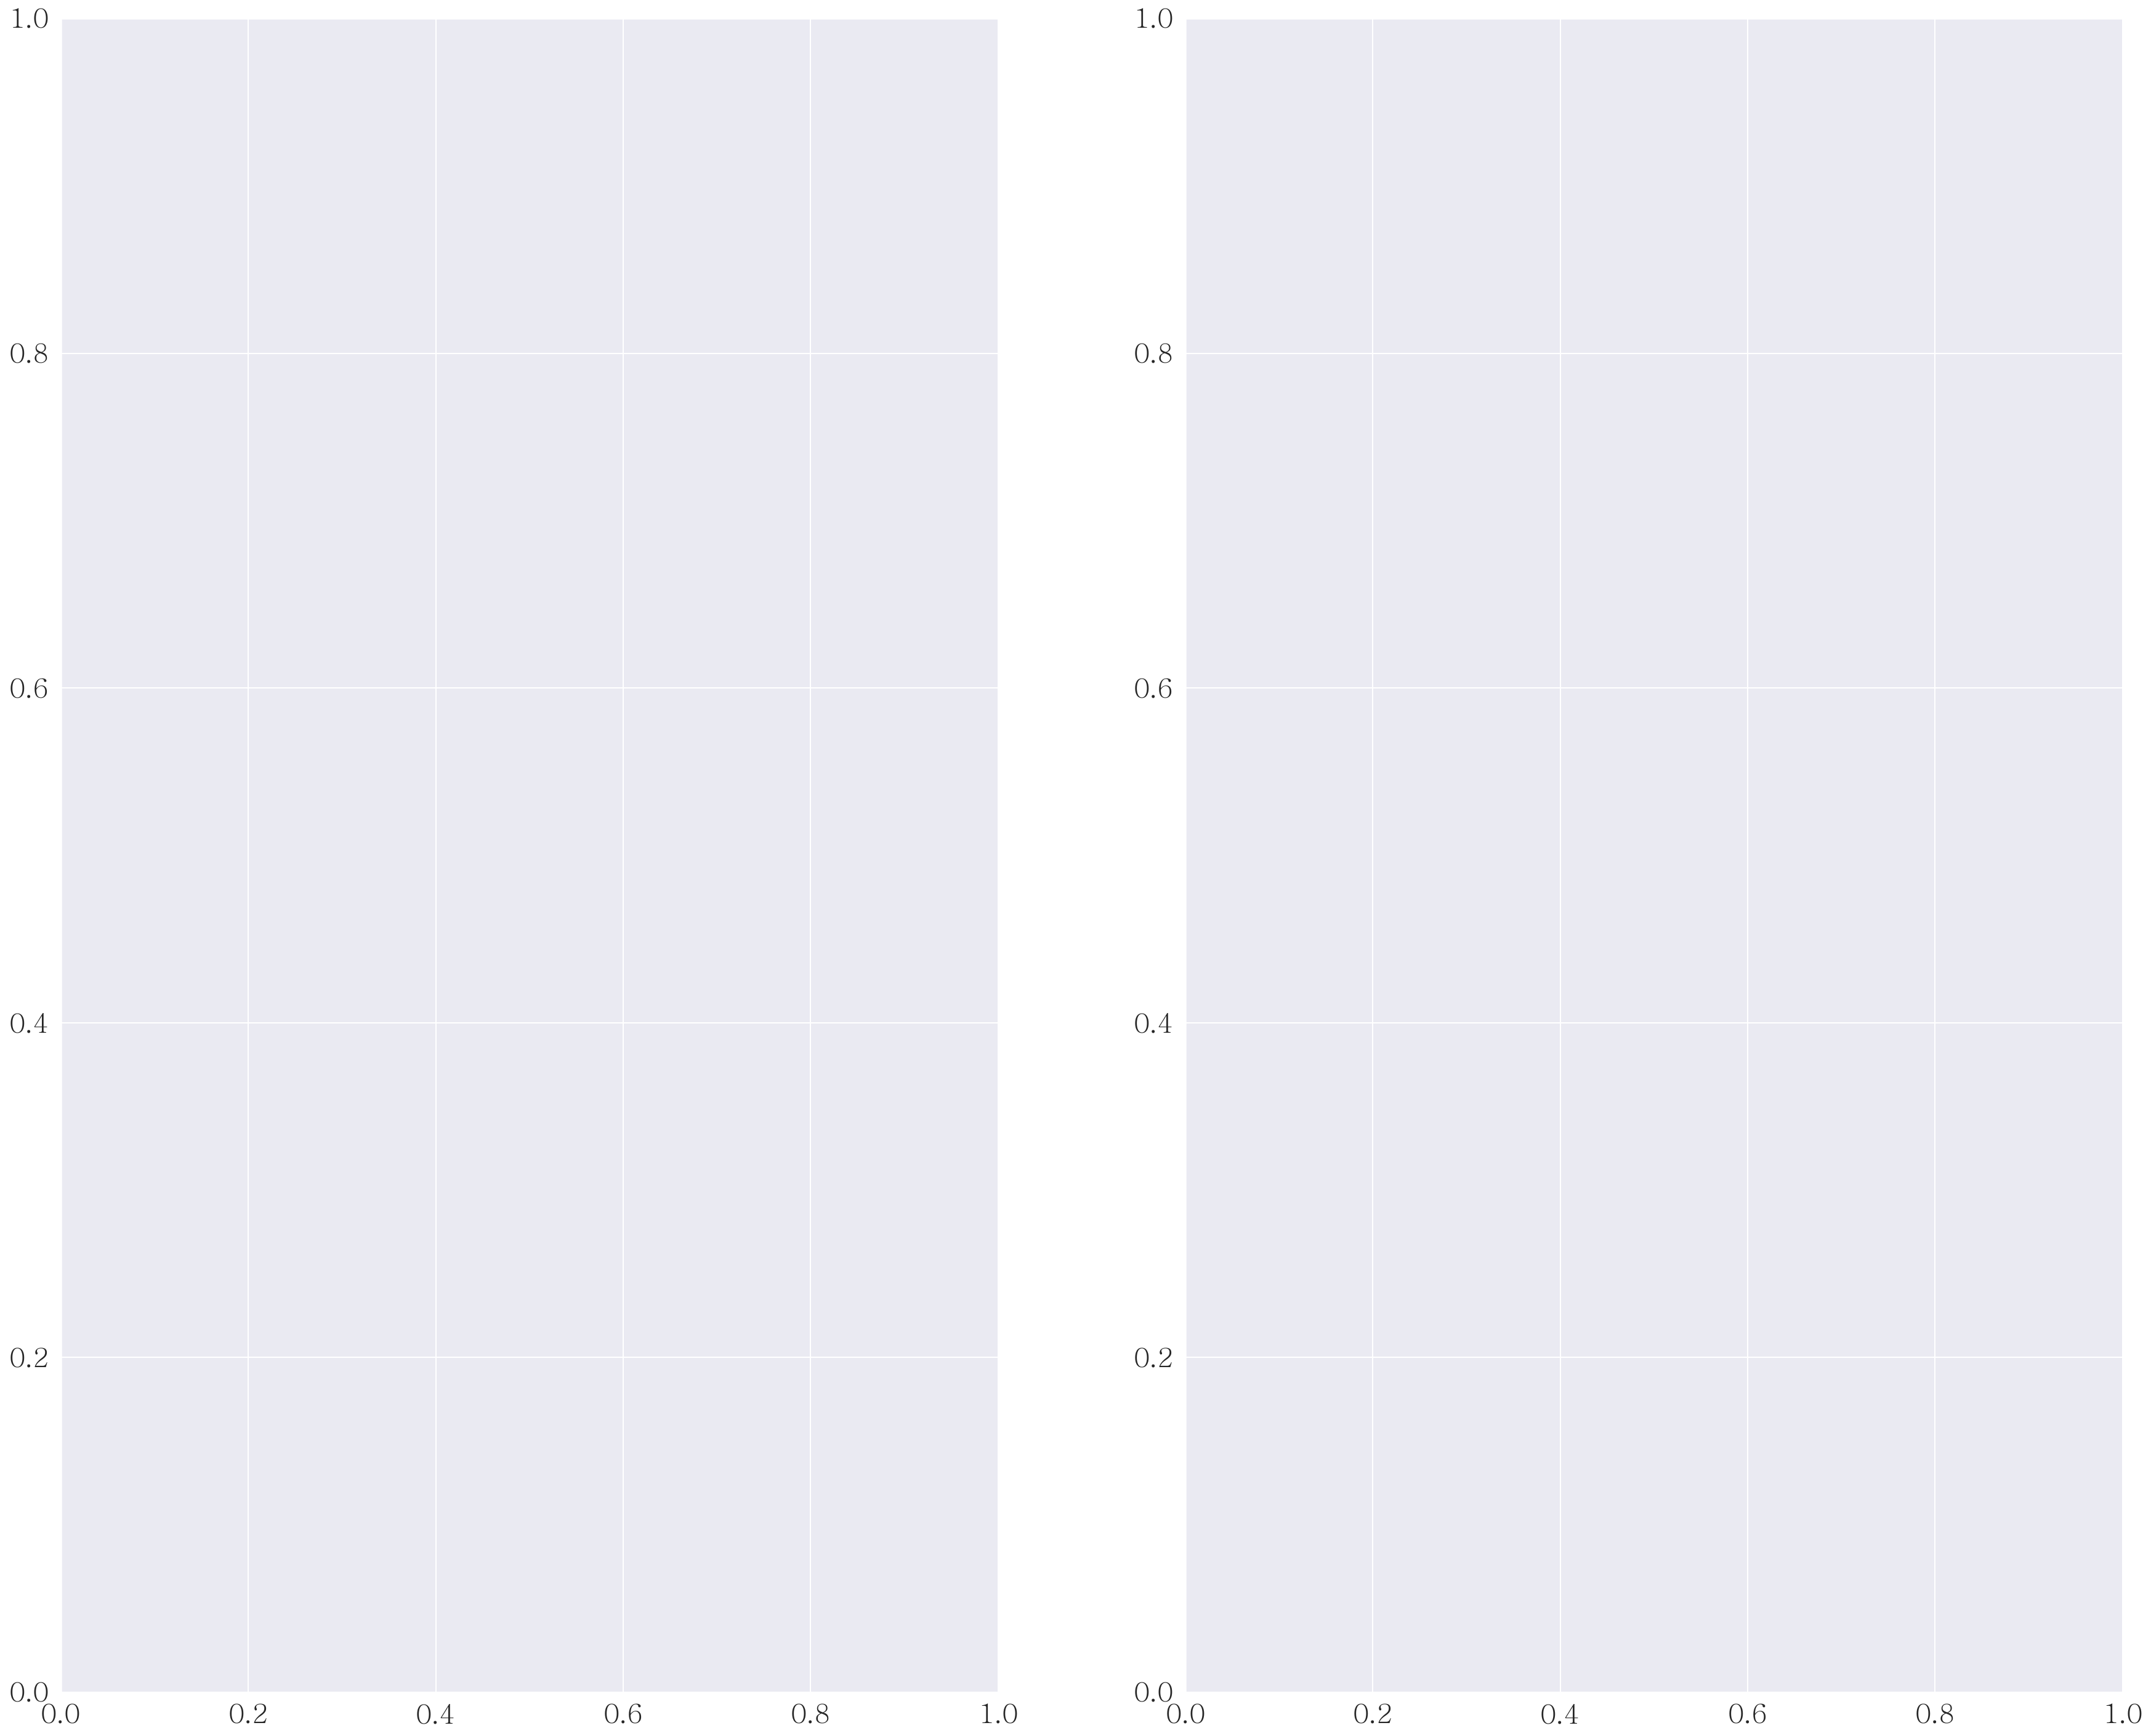

In [146]:
fig, axes = plt.subplots(1,2)

plot_p=plt.bar(sc_p,figsize=(10,5), color='y')
plot_q=sc_q.plot(kind='bar',figsize=(10,5), color='g')
plot_p.set_xticklabels(labels=sc_p.index, rotation=45)
plot_q.set_xticklabels(labels=sc_q.index, rotation=45)

plt.show()

## 고객 코호트(cohort)분석 : 우수 고객 찾기

In [196]:
# 인덱스 변환전 저장 원본 데이터 불러오기
df = pd.read_csv('online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 우수 고객 찾기

In [194]:
# 고객코드별 가격의 합계가 높은 순으로 저장하는 변수생성
best_c = data.groupby('CustomerID')['Price'].sum().sort_values(ascending=False)

In [195]:
best_c

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: Price, Length: 4338, dtype: float64

## 몇시에 push 마케팅을 하는게 제일 좋을까?
- 쇼핑을 적게 하는 시간에 해야할까?
- 아님 쇼핑을 많이 하는 시간에? (사려고 보고 있으면 더 잘보지 않을까?)

## 고객별 주문을 가장 많이 하는 시간은?

In [28]:
# 시간 컬럼 추가
data['Time']= data.iloc[0,4].strftime('%H')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,08
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,08
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08


In [17]:
a = data.groupby('CustomerID')
a.groupby('data.iloc[0,4].year')['Price'].sum()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [30]:
data.pivot(index='Time', columns = 'CustomerID',values ='Price')

ValueError: Index contains duplicate entries, cannot reshape